# Leveraging AI for Signal Processing

### Introduction

In recent years, Unmanned Aerial Vehicles (UAV) or drones are becoming more and more popular due to their advancement in technology, size and lower in cost. These made drones viable for various useful applications, such as weather observation, inspection of infrastructures and fire detections. However, the effectiveness of drones’ application may also lead to technical, security and public safety issues. Hence, it is essential for government entities to be able to detect and identify unauthorised drones in the air space.
 
The conventional methods of identifying and detecting drones uses radars, camera vision and sound identification. These detection methods maybe useful to a certain extent but they are not solely reliable and are easily restrained. For example, in camera vision object detection, identifying of drones in the air space at night and in a vicinity with birds posed a huge challenge to identify the presence of drones.Since drones are usually remotely controlled using wireless technology such as Bluetooth and WIFI, a new approach will be to use Radio Frequency (RF) signals combined with deep learning approach to sense and identify drones in the airspace. In addition, since different drones’ modes generate different RF signals, this approach will be able to identify the current activities of the drones


### Basic understanding of Radio Frequency (RF) 

In radio frequency theory, RF signals can be represented into Time or Frequency domains. Both domains hold the same information of the signal. For time-domain graph, it shows how a signal changes over time, whereas a frequency-domain graph shows how much of the signals lies within each given frequency band over a range of frequencies. To illustrate, a RF signal can be synthetically generated using a sine wave composing of different frequency sine waves using numpy libraries. For the sake of understanding, the sampling frequency (Fs) used is 150Hz , frequency components (Fc), 20Hz with an amplitude of 1, 40 Hz with an amplitude of  0.5 and  5 Hz with an amplitude of 1.5.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

Fs = 150 
t= np.arange(0,1,1/Fs)
f1 = 20 # Hz
f2 = 40 # Hz
f3 = 5 # Hz

wave1 = np.sin(2*np.pi*20*t)
wave2 = np.sin(2*np.pi*20*t)+0.5*np.sin(2*np.pi*40*t)
wave2 = np.sin(2*np.pi*20*t)+0.5*np.sin(2*np.pi*40*t)+1.5*np.sin(2*np.pi*5*t)


## 20 Hertz Sine wave
### Time Domain 

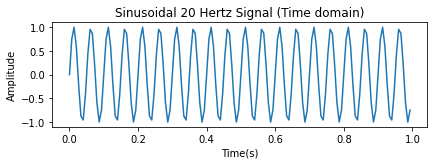

In [25]:
plt.subplot(2,1,1)
plt.plot(t,wave1)
plt.title("Sinusoidal 20 Hertz Signal (Time domain)")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.tight_layout()


## 20Hz , 40Hz & 5Hz Sine wave



### Time Domain

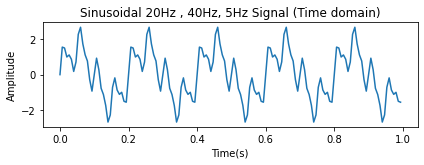

In [29]:
plt.subplot(2,1,1)
plt.plot(t,wave2)
plt.title("Sinusoidal 20Hz , 40Hz, 5Hz Signal (Time domain)")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.tight_layout()

## Understanding FFT Function

Representing the RF signal from time domain to frequency domain uses Fast Fourier Transform (FFT) function in Numpy. It is an algorithm that computes the discrete Fourier Transform (DFT) of the sequence and converts it into frequency domain.


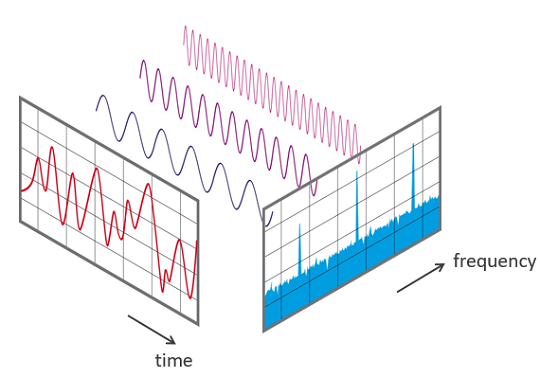

#### FFT Formula 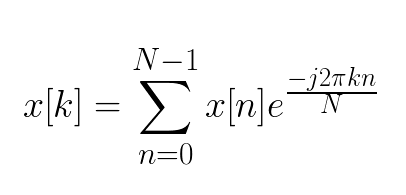

Given a RF sine wave signal, the RF signal is first sampled at the sampling frequency, Fs, based on Nyquist frequency. In nyquist frequency theory, the sampling frequency must be at least 2 times the highest frequency component of the signal to prevent aliasing. In our example, the highest frequency component is 40Hz. Hence, sampling frequency of 150Hz is more than sufficient.

### Performing FFT on sample sequence


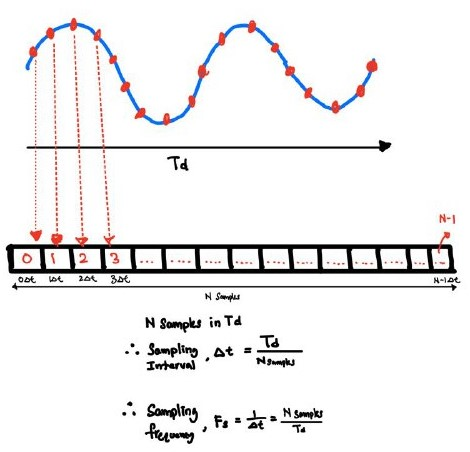

- Sampling Intervals, t = Td/Nsample 
- Sampling Frequency , Fs = 1/t = Nsamples / Td 

For the above diagram, assume the blue sine wave signal's parameters are:
- Frequency Component, Fin , 125Hz
- Number of samples , N = 16
- Sampling Frequency, Fs = 1000Hz

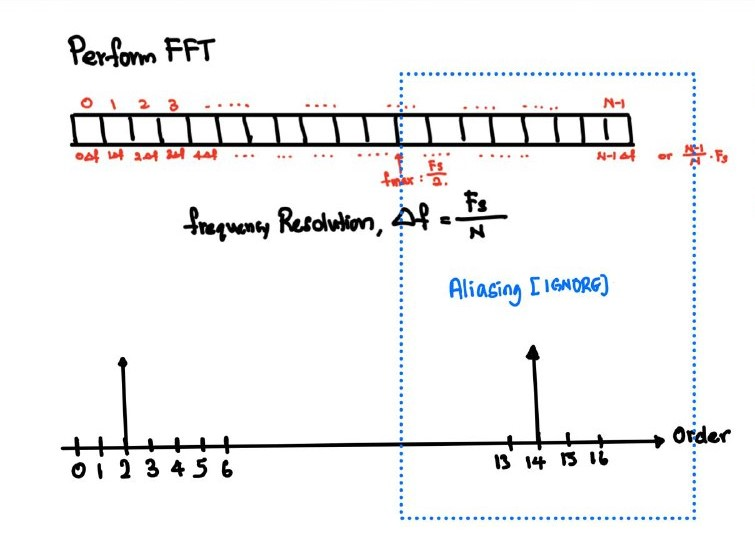

- Frequency Resolution , f = Fs/N

After performing FFT on the sample seqeunce, the frequency sequences runs from 0 to N-1 order with a frequency resolution of Fs/N. As shown on the above diagram, the spike resides on the second and 14th order after FFT. Given that Fs is 1000Hz, the maximum frequency that holds the Nyquist Sampling rule is at Fmax, Fs/2. Any spike that appears after Fmax will be ignored and deemed as alised.


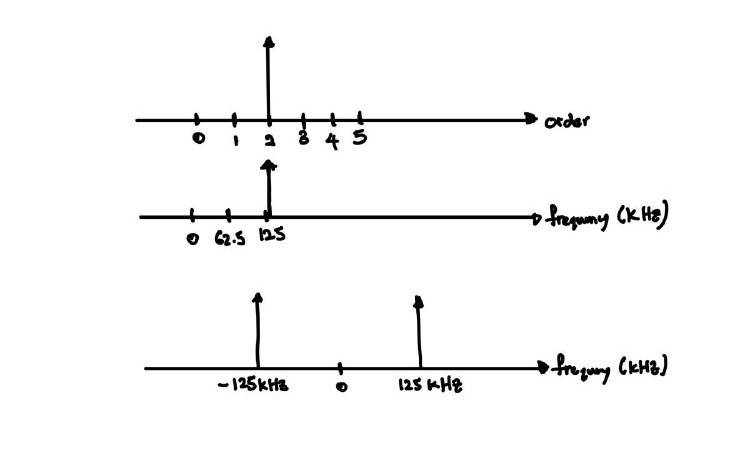

- Frequency Resolution = 1000/16 = 62.5Hz
- Order where the spike resides = 2
- Frequency = Order x Frequency Resolution
- Frequency = 2 x 62.5Hz = <b>125Hz</b>

## 20 Hertz Sine wave
### Frequency Domain 

In [26]:
n = np.size(t)
wave1_FFT = (2/n)*abs(fft(wave1))
fft_fr = syfp.fftfreq(len(wave1),1/Fs)

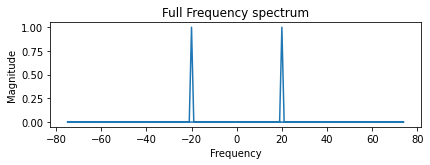

In [33]:
plt.subplot(2,1,1)
plt.plot(fft_fr,wave1_FFT)
plt.title("Full Frequency spectrum")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()

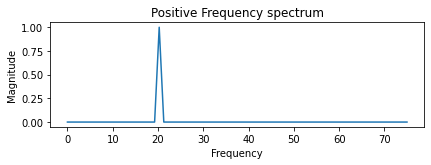

In [28]:
fr_positive = (Fs/2)*np.linspace(0,1,n//2)
plt.subplot(2,1,1)
plt.plot(fr_positive,wave1_FFT[0:np.size(fr_positive)])
plt.title("Positive Frequency spectrum")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()

## 20Hz , 40Hz & 5Hz Sine wave

### Frequency Domain

In [ ]:
n = np.size(t)
wave2_FFT = (2/n)*abs(fft(wave2))
fft_fr_wave2 = syfp.fftfreq(len(wave2),1/Fs)

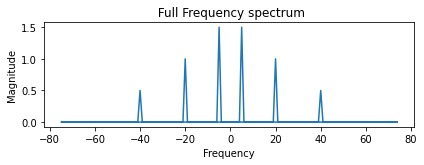

In [32]:
plt.subplot(2,1,1)
plt.plot(fft_fr_wave2,wave2_FFT)
plt.title(" Full Frequency spectrum")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()

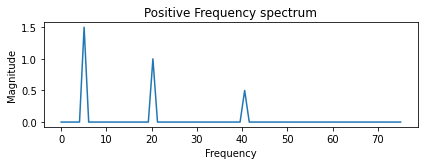

In [34]:
fr_positive = (Fs/2)*np.linspace(0,1,n//2)
plt.subplot(2,1,1)
plt.plot(fr_positive,wave2_FFT[0:np.size(fr_positive)])
plt.title("Positive Frequency spectrum")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()

With the basic understanding of RF signals and Fast Fourier Transform (FFT), this report will be analysing two different academia datasets – DroneRF and DeepSig. After which, the author will be implementing different machine learning algorithms on each dataset and train a model that classifies different drones and activities for DroneRF dataset and different types of modulation for DeepSig dataset. 

## DroneRF Dataset


DroneRF dataset systematically record raw RF signals of different drones under different flight modes such as : on , off and connected, hovering , flying without video recording and flying with video recording. There are three different types of drones used in this dataset - Bepop drone , AR drone and Phantom drone. 

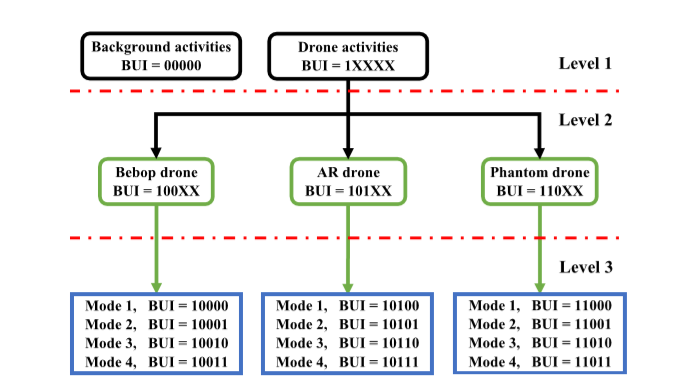

For back ground activties with no drones turned on, the RF signals are labelled with a Binary Unique Identifier (BUI) = 00000 and if drones are activated, the BUI for the RF signal will be labelled with a  prefix 1. Each drones are labelled respectively : Bepop Drone (100xx) , AR Drone (101xx) and Phantom Drone (110xx). The different flights modes are  labelled and are appended to their respective drone's BUI.

- Mode1 [On and connected to the controller] : BUI = XXX00
- Mode2 [Hovering automatically] : BUI = XXX01
- Mode3 [Flying without Video Recording] : BUI = XXX10
- Mode4 [Flying with Video Recording] : BUI = XXX11

The diagram above shows the overall flow of how RF siganls are labelled in DroneRF dataset.

The raw RF signals was recorded for:
- <b>10.25 seconds</b> for background RF activities 
- <b>5.25 seconds</b> for RF drone communication

### Dataset Format
For simplicity and to prevent memory overflow, the signals recorded in DroneRF dataset are stored as segments in standard comma-separted values (CSV) format.

Each csv file are named with the following format :

[Type of drone & mode ][Upper or lower segment] _ [Segment Number ] .csv

###### Example
100<b>00H_0</b>.csv
    
<b>[Bepop Drone & On and connected to the controller][Upper segment]_[Segment 0].csv</b>
    
The raw samples are recorded using two National Intrument USRP-2943 software defined radio and each RF receiver has a maximum bandwidth of  40MHz. Since WIFI spectrum is 80MHz, the first receiver will capture the lower half of the spectrum while the second receiver will capture the upper half the spectrum. This is why, for each csv file there will be an upper (H) and lower (L) for each drone,mode and segment.


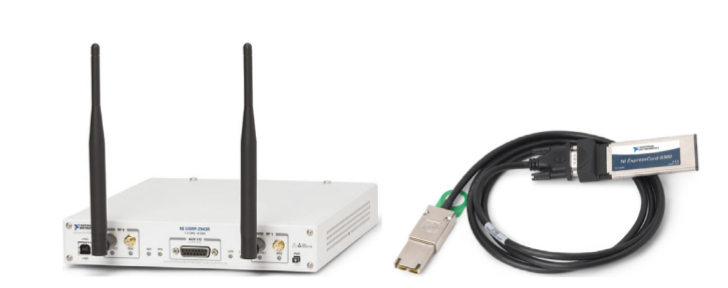

### Number of Segments for each Drone and Mode

- Bepop Drone Mode 1 :   21 segments 
- Bepop Drone Mode 2 :   21 segments
- Bepop Drone Mode 3 :   21 segments
- Bepop Drone Mode 4 :   21 segments


- AR Drone Mode 1 :   21 segments
- AR Drone Mode 2 :   21 segments
- AR Drone Mode 3 :   21 segments
- AR Drone Mode 4 :   16 segments



- Phantom Mode 1 :    21 segments



- Background activities (No Drones) :  41 segments

<b>Total Number of segments with Drones :  186

Total Number of segments without Drones : 41 <b>
    



## Analyses of one segment - Ardrone Segment 18 H & L 

Each Drone mode segments consist of 20 million RF samples. Where Upper spectrum (H) holds 10 million RF samples and Lower spectrum (L) hold the remaining 10 million RF samples


In [3]:
import numpy as np
ardrone_segment_18_h=np.loadtxt('/home/jax/projects/signals/ardrone/10100H_18.csv', delimiter=",")
ardrone_segment_18_l=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_18.csv', delimiter=",")
print("ARDrone Segment 18 L consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_l.shape[0],min(ardrone_segment_18_l),max(ardrone_segment_18_l)))
print("ARDrone Segment 18 H consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_h.shape[0],min(ardrone_segment_18_h),max(ardrone_segment_18_h)))


ARDrone Segment 18 L consists of 10000000 freq samples with a min/max of -8338.0/8213.0
ARDrone Segment 18 H consists of 10000000 freq samples with a min/max of -220.0/182.0


## Time series spectrum of different Drone modes 

*Objective: Without any prior understanding on the dataset, the author wishes to recreate the time domain plot as shown on the paper. This is to validate that the dataset downloaded is coherent with the paper released. Refer to Fig 10 (a) (b) (c) in the published paper*

Since the RF signals of one activity is recorded for 5.25 seconds,one segment will be approximately 0.25 seconds [ 5.25 seconds/ 21 segment ]

- Time duration of each CSV file : 0.25 seconds
- Number of Samples = 10,000,000
- Therefore, Sampling Frequency (Fs) = 10,000,000 / 0.25 seconds = 40 Million Hertz 

### Background RF activities Segment 5 ( Time Domain )

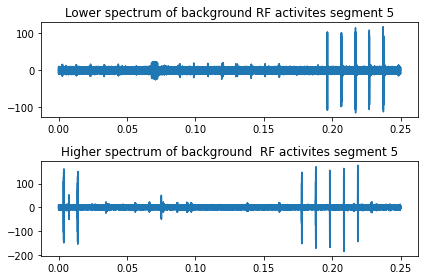

In [16]:
import numpy as np
backgroundrfactivities_segment_5_H1=np.loadtxt('data/DroneRF/backgroundrfactivities/00000H_5.csv', delimiter=",")
backgroundrfactivities_segment_5_L1=np.loadtxt('data/DroneRF/backgroundrfactivities/00000L_5.csv', delimiter=",")

time = 0.25 
Fs = len(backgroundrfactivities_segment_5_H1)/time # 40 million Hz
t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(t,backgroundrfactivities_segment_5_L1)
axs[0].set_title('Lower spectrum of background RF activites segment 5')
axs[1].plot(t,backgroundrfactivities_segment_5_H1)
axs[1].set_title('Higher spectrum of background  RF activites segment 5')

fig.tight_layout()

### Bepopdrone Flying and Video Recording Segment 10 ( Time domain )


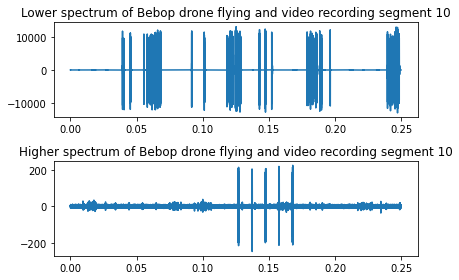

In [17]:
import numpy as np
Bebop_flying_videorecording_segment_10_H1=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011H_10.csv', delimiter=",")
Bebop_flying_videorecording_segment_10_L1=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011L_10.csv', delimiter=",")


Fs = len(backgroundrfactivities_segment_5_H1)/time # 40 million Hz
t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(t,Bebop_flying_videorecording_segment_10_L1)
axs[0].set_title('Lower spectrum of Bebop drone flying and video recording segment 10')
axs[1].plot(t,Bebop_flying_videorecording_segment_10_H1)
axs[1].set_title('Higher spectrum of Bebop drone flying and video recording segment 10')
fig.tight_layout()

### Phantom Drone On and Connected Segment 7 (Time Domain)

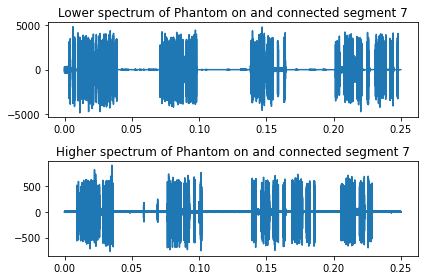

In [29]:
import numpy as np
phantom_on_and_connected_segment_7_H1=np.loadtxt('/home/jax/projects/signals/phantomdrone/11000H_7.csv', delimiter=",")
phantom_on_and_connected_segment_7_L1=np.loadtxt('/home/jax/projects/signals/phantomdrone/11000L_7.csv', delimiter=",")

time = 0.25 # 40million sample in 1 seconds
Fs = len(backgroundrfactivities_segment_5_H1)/time # 40 million Hz
t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(t,phantom_on_and_connected_segment_7_L1)
axs[0].set_title('Lower spectrum of Phantom on and connected segment 7')
axs[1].plot(t,phantom_on_and_connected_segment_7_H1)
axs[1].set_title('Higher spectrum of Phantom on and connected segment 7')
fig.tight_layout()

### Phantom Drone On and Connected Segment 7 (Frequency Domain)

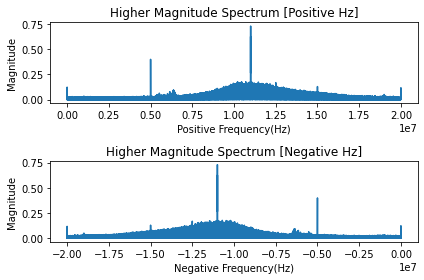

In [38]:
import numpy as np 
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

n = np.size(t)
freq_axis_positive = (Fs/2)*np.linspace(0,1,n//2) # Only retriving the effective postive spectrum
freq_axis_negative = (Fs/2)*np.linspace(0,-1,n//2) 

mean_of_phantom_H = np.mean(phantom_on_and_connected_segment_7_H1) #Removing any DC Offset 
x_H = fft((phantom_on_and_connected_segment_7_H1-mean_of_phantom_H))
x_H_abs = (2/n)*abs(x_H[0:np.size(freq_axis_positive)])

import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(freq_axis_positive,x_H_abs)### Phantom Drone On and Connected Segment 7 (Time Domain),x_H_abs)
plt.title("Higher Magnitude Spectrum [Positive Hz]")
plt.xlabel('Positive Frequency(Hz)')
plt.ylabel('Magnitude')

import matplotlib.pyplot as plt
plt.subplot (2,1,2)
plt.plot(freq_axis_negative,x_H_abs)
plt.title("Higher Magnitude Spectrum [Negative Hz]")
plt.xlabel('Negative Frequency(Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()


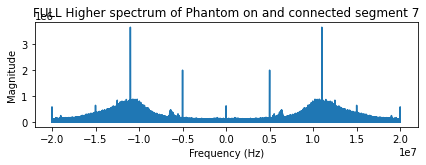

In [48]:
freqs_H = syfp.fftfreq(len(phantom_on_and_connected_segment_7_H1),1/Fs)
full_segment_7_Higher =np.fft.fft(phantom_on_and_connected_segment_7_H1)

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(freqs_H,np.abs(full_segment_7_Higher)) # in frequencies 
plt.title('FULL Higher spectrum of Phantom on and connected segment 7')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()


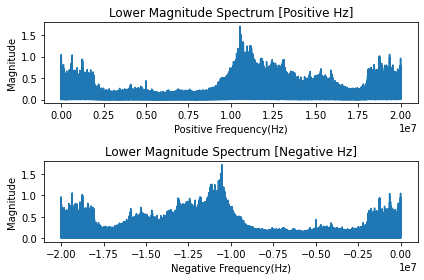

In [52]:
mean_of_phantom_L = np.mean(phantom_on_and_connected_segment_7_L1)
x_L = fft(phantom_on_and_connected_segment_7_L1-mean_of_phantom_L)
x_L_abs = (2/n) * abs(x_L[0:np.size(freq_axis_positive)])

import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(freq_axis_positive,x_L_abs)
plt.title("Lower Magnitude Spectrum [Positive Hz]")
plt.xlabel('Positive Frequency(Hz)')
plt.ylabel('Magnitude')

plt.subplot (2,1,2)
plt.plot(freq_axis_negative,x_L_abs)
plt.title("Lower Magnitude Spectrum [Negative Hz]")
plt.xlabel('Negative Frequency(Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()


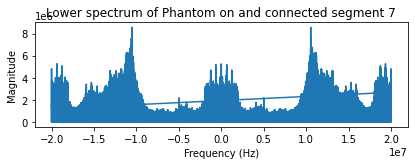

In [54]:
freqs_L = syfp.fftfreq(len(phantom_on_and_connected_segment_7_L1),1/Fs)
full_segment_7_Lower =np.fft.fft(phantom_on_and_connected_segment_7_L1)

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(freqs_L,np.abs(full_segment_7_Lower)) # in frequencies 
plt.title('FULL Lower spectrum of Phantom on and connected segment 7')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()

*One flaw of using fftfreq : The fftfreq function from Numpy.fft libraries caused a linear line to be plotted only on the Lower magnitude spectrum dataset. The reason for this linear line is still unknown. However, in machine learning perspective , this linear line will not affect the training of the model since fftfreq function is merely used for spectrum representation purposes.*

### The entire spectrum : Higher + Lower Spectrum

The higher and lower spectrum of the recorded RF dataset datset are said to be recorded concurrently using two RF receivers. In order to concatenated the transformed signal of both receivers to build an entire spectrum, a normalisation factor, C must be calculated. The normalisation factor C, ensures that the spectral are in continuity between the two half's of the RF spectrum since they are captured using two different devices.

The normalisation factor, C :

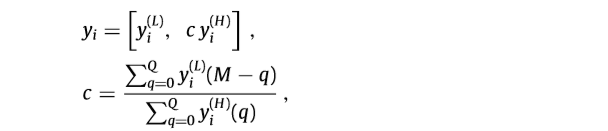


The normalisation factor is calculated as the ratio between the last Q samples of the lower spectra and the first Q samples of the upper spectra. 

- Carrier frequency for Lower Spectrum : 2420 MHz

- Carrier frequency for Upper Spectrum : 2460 HHz 

- Bandwidth for spectrum: 40 MHz

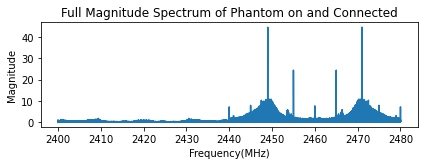

In [59]:
import numpy as np

x_H_abs = (2/n)*abs(x_H[0:np.size(freq_axis_positive)])
x_L_abs = (2/n) *abs(x_L[0:np.size(freq_axis_positive)])

Q = 10 # number of returning points for spectral continuity

#equation_from_paper xf = low , yf = high [ Low , High]

mean_Low = np.mean(x_L_abs[-Q-1:-1])
mean_High= np.mean(x_H_abs[0:Q])

Normalising_factor= mean_Low/mean_High

x_H_abs_normalised = (2/n) * abs(x_H[0:np.size(fr)]) * Normalising_factor

Center_frequency_Lower = 2420
Center_frequency_Upper = 2460

fr_full_L_positive  = ((Fs/2)*np.linspace(0,1,n//2))/1e6
fr_full_L_negative  = ((Fs/2)*np.linspace(0,-1,n//2))/1e6
fr_full_L = np.concatenate((fr_full_L_negative + Center_frequency_Lower ,fr_full_L_positive + Center_frequency_Lower),axis = 0)
fr_full_L_fft = np.concatenate((x_L_abs,x_L_abs),axis = 0) # contains the full spectrum FFT since X_L_abs only contains half 


fr_full_H_positive  = ((Fs/2)*np.linspace(0,1,n//2))/1e6
fr_full_H_negative  = ((Fs/2)*np.linspace(0,-1,n//2))/1e6

fr_full_H = np.concatenate((fr_full_H_negative+Center_frequency_Upper,fr_full_H_positive+Center_frequency_Upper),axis = 0)
fr_full_H_fft = np.concatenate((x_H_abs_normalised,x_H_abs_normalised),axis = 0) 

Full_spectrum = np.concatenate((fr_full_L_fft,fr_full_H_fft),axis=0)
fr_full = np.concatenate((fr_full_L,fr_full_H),axis =0)


import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(fr_full,Full_spectrum)
plt.title("Full Magnitude Spectrum of Phantom on and Connected")
plt.xlabel('Frequency(MHz)')
plt.ylabel('Magnitude')

plt.tight_layout()

### Preprocessing Dataset - FFT entire dataset

For better learning of the RF signal, the segmented RF signal (10 million samples) is further segmented in 100 smaller segments. Thus, each smaller segments will only contain 100,000 raw RF signal samples. The written code then uses Numpy FFT algorithm with 1028 frequency bins on each smaller segment and concatenate the results when all raw RF signals segments have been transformed. The concetenated results holds the magnitude of the RF signal. Hence, squaring it will give us the power spectrum of the RF signal. This result is saved into a directory ('data/DroneRF/Drone_RF_FFT') and is ready for machine learning training


In [1]:
import numpy as np 
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp
#parameters

BUI =[0]*8
BUI[0] = '00000' #BUI of RF background activities
BUI[1:4] = ['10000','10001','10010','10011'] #BUI of the Bebop drone RF activities
BUI[5:8] = ['10100','10101','10110','10111'] #BUI of the AR drone RF activities
BUI[9]='11000'#BUI of the Phantom drone RF activities

Drones = {0:'backgroundrfactivities', 1:'bebopdrone', 2:'bebopdrone', 3:'bebopdrone', 4:'bebopdrone' 
          , 5:'ardrone' , 6:'ardrone' ,7:'ardrone' ,8:'ardrone' , 9: 'phantomdrone'}

M = 2048 #Total number of frequency bins
L = 1e5 #Total number samples in a segment
Q = 10 #Number of returning points for spectral continuity


In [76]:
for i in range (len(BUI)):
    flag = 1
    if BUI[i] == '00000':
        N = 41
        selected_drones = Drones[0]
    elif BUI[i] == '10111':
        N = 18
    else:
        N = 21
    data = []
    cnt = 1

    counter = 0 # for checking


    for j in range (N):
        counter = counter + 1
        if BUI[i] == '00000' :
            print('data/DroneRF/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv')
            x_H=np.loadtxt('data/DroneRF/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv', delimiter=",")
            y_L=np.loadtxt('data/DroneRF/'+ Drones[i] +'/' + str(BUI[i]) +'L_'+ str(j)+'.csv', delimiter=",")
            factor = int(len(x_H)/L)
        
        else:
            print("the number" +str(j)+str(i))
            print('/home/jax/projects/signals/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv')
            x_H=np.loadtxt('/home/jax/projects/signals/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv', delimiter=",")
            y_L=np.loadtxt('/home/jax/projects/signals/'+ str(Drones[i]) +'/' + str(BUI[i]) +'L_'+ str(j)+'.csv', delimiter=",")
            factor = int(len(x_H)/L)
            
        for k  in range(1,factor+1):
            start = int(1 + (k-1)*L)
            finish = int(k*L)
    
            xf = abs(np.fft.fftshift(fft(x_H[start:finish]-np.mean(x_H[start:finish]),M)))
            end_xf=xf.shape[0]
            xf=xf[int(end_xf/2):end_xf]

            yf = abs(np.fft.fftshift(fft(y_L[start:finish]-np.mean(y_L[start:finish]),M)))
            end_yf=yf.shape[0]
            yf=yf[int(end_yf/2):end_yf]
            normalisation_factor = np.divide((np.mean(xf[-Q-1:-1])),np.mean(yf[0:Q]))
            yf = yf*normalisation_factor
    
            xf = np.transpose(xf)
            yf = np.transpose(yf)
            xf_yf = np.r_[xf,yf]
    
            if flag == 1:
                data = xf_yf
                flag = 0
            else:
                data = np.c_[data,xf_yf]

                
        print(int(100*j/N))
        print(data.shape)
        
    Data=np.square(data)
    save_L_H =np.savetxt('data/DroneRF/' + 'testing_FFT'+'/'+str(BUI[i])+'_FFT_power.csv',Data, delimiter=",")
    print("Saving")
        
 

the number03
/home/jax/projects/signals/bebopdrone/10010H_0.csv
0
(2048, 100)
the number13
/home/jax/projects/signals/bebopdrone/10010H_1.csv
4
(2048, 200)
the number23
/home/jax/projects/signals/bebopdrone/10010H_2.csv
9
(2048, 300)
the number33
/home/jax/projects/signals/bebopdrone/10010H_3.csv
14
(2048, 400)
the number43
/home/jax/projects/signals/bebopdrone/10010H_4.csv
19
(2048, 500)
the number53
/home/jax/projects/signals/bebopdrone/10010H_5.csv
23
(2048, 600)
the number63
/home/jax/projects/signals/bebopdrone/10010H_6.csv
28
(2048, 700)
the number73
/home/jax/projects/signals/bebopdrone/10010H_7.csv
33
(2048, 800)
the number83
/home/jax/projects/signals/bebopdrone/10010H_8.csv
38
(2048, 900)
the number93
/home/jax/projects/signals/bebopdrone/10010H_9.csv
42
(2048, 1000)
the number103
/home/jax/projects/signals/bebopdrone/10010H_10.csv
47
(2048, 1100)
the number113
/home/jax/projects/signals/bebopdrone/10010H_11.csv
52
(2048, 1200)
the number123
/home/jax/projects/signals/bebopdr

KeyboardInterrupt: 

## Machine Learning (DroneRF) - Binary Classification

The machine learning model frame work used is  <b>Keras</b>

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import preprocessing

import random

directory = 'data/DroneRF/RF_Data_FFT/'

### Preparing Dataset - DroneRF
Using the preprocessed FFT data from above, the aim of this model is to be able to differentiate and classifiy drone vs nodrone (BackgroundRF activities). The drones used are BepopDrone and PhantomDrone 

In [4]:
bepop = np.loadtxt(directory+'10000_FFT_power.csv', delimiter=",")
phantomDrone1 = np.loadtxt(directory+'11000_FFT_power.csv',delimiter=",")
backgroundRFnoise = np.loadtxt(directory+'00000_FFT_power.csv',delimiter = ",")
print(backgroundRFnoise.shape)
random.shuffle(backgroundRFnoise)
noDrones = backgroundRFnoise[:,:]


(2048, 4100)


- Number of input features : 2048
- Number of  data for noDrones (backgrounRFnoise) : 4100
- Number of  data for Drones : 2100 (Bepop) + 2100 (Phantom)= 4200

The conventional way to structure a dataset is <b>[no of data X Input features]</b>. However, for the preprocessed FFT of DroneRF, it is opposite <b>[Input features X No of data]</b> . Hence, an additional step is required to transpose the results when reading directly from the drone's CSV file. Since noDrones contains only 4100 datas, for consistency and unbaised sake, the number of datas used for Drones should be the same as well.

In [6]:
bepop_transpose = np.transpose(bepop)
phantomdrone_transpose = np.transpose(phantomDrone1)
Drone_transpose = np.vstack((bepop_transpose,phantomdrone_transpose)) #stack the two drones data together
Drone_transpose = Drone_transpose[0:4100,:] #for consistency sake, the number of availble data for drones should be the same as noDrones
noDrones_transpose = np.transpose(noDrones)

In most of the machine learning algorithms, it works better when the features are relatively similar scale and close to normal distribution. For this report, the author uses StandardScaler method to preprocess the data for machine learning. Standardscaler standardiszes a feature by substracting the mean and then scaling to unit variance. 

In [8]:
normalised_Drones = preprocessing.StandardScaler().fit_transform(Drone_transpose)
normalised_noDrones = preprocessing.StandardScaler().fit_transform(noDrones_transpose)


### Labelling - DroneRF

- Drones : 1
- noDrones : 0

The labels are appended for each row of data

In [9]:
Label_bepopDrone1 = np.array([1])
Drones_dataset_concatenate = np.tile(Label_bepopDrone1[np.newaxis,:],(normalised_Drones.shape[0],1)) #Transforming the lavelled array[1] into the same shape as Drones Dataset
Drones_dataset=np.concatenate((normalised_Drones,Drones_dataset_concatenate),axis=1)

Label_noDrones = np.array([0])
noDrones_dataset_concatenate = np.tile(Label_noDrones[np.newaxis,:],(normalised_noDrones.shape[0],1))
noDrones_dataset =np.concatenate((normalised_noDrones,noDrones_dataset_concatenate),axis =1 )

In [20]:
print('An example of a single data with 2048 input features followed by a label at index 2049. \n')
print(str(Drones_dataset[0]))


An example of a single data with 2048 input features followed by a label at index 2049. 

[-0.19144631 -0.23254951 -0.22885139 ... -0.1942947  -0.18225159
  1.        ]


In [22]:
stacked_dataset = np.vstack((Drones_dataset, noDrones_dataset))

### Training (70%) , Validation(20%) , Testing (10%)


In [24]:
np.random.shuffle(stacked_dataset)
# Randomised the dataset before splitting 70-20-10 without the help of libraries

In [25]:
TrainingSet_index = int(0.7*stacked_dataset.shape[0]) #2940
Validation_index = int(0.2*stacked_dataset.shape[0])#840
Test_index = int(stacked_dataset.shape[0] - (TrainingSet_index + Validation_index)) #420
stacked_dataset.shape

(8200, 2049)

Total Size of entire dataset (Drones+NoDrones) : 8200 
- Size of Training dataset : 2940
- Size of Validation dataset : 840
- Size of Testing dataset : 420

In [26]:
Training_set = stacked_dataset[0:TrainingSet_index]
Validation_set = stacked_dataset[TrainingSet_index:Validation_index+TrainingSet_index]
Test_set = stacked_dataset[Validation_index+TrainingSet_index:8200]

Seperate the label from the data in the stacked dataset. The corresponding label for each row of data is always at index 2049.

In [ ]:
X_Trained = Training_set[:,0:2048]
Y_Trained = Training_set[:,2048:2049]

X_Validation = Validation_set[:,0:2048]
Y_Validation = Validation_set[:,2048:2049]

X_Test = Test_set[:,0:2048]
Y_TrueClassification = Test_set[:,2048:2049]

Deep Learning using 3 layers with relu and sigmoid as the activation function. For learning , the loss function used is binary crossentropy

In [28]:
model = Sequential()
model.add(Dense(2048, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(X_Trained, Y_Trained, epochs=150, batch_size=10)

Epoch 1/150
574/574 [==============================] - 1s 2ms/step - loss: 1.3391 - accuracy: 0.9681
Epoch 2/150
574/574 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9965
Epoch 3/150
574/574 [==============================] - 2s 3ms/step - loss: 0.0273 - accuracy: 0.9977
Epoch 4/150
574/574 [==============================] - 1s 2ms/step - loss: 5.7322e-05 - accuracy: 1.0000
Epoch 5/150
574/574 [==============================] - 1s 2ms/step - loss: 1.1479e-05 - accuracy: 1.0000
Epoch 6/150
574/574 [==============================] - 1s 2ms/step - loss: 9.3565e-06 - accuracy: 1.0000
Epoch 7/150
574/574 [==============================] - 1s 2ms/step - loss: 7.4170e-06 - accuracy: 1.0000
Epoch 8/150
574/574 [==============================] - 1s 2ms/step - loss: 5.9924e-06 - accuracy: 1.0000
Epoch 9/150
574/574 [==============================] - 1s 2ms/step - loss: 4.8276e-06 - accuracy: 1.0000
Epoch 10/150
574/574 [==============================] - 1s 2ms/step

In [31]:
_, accuracy = model.evaluate(X_Validation, Y_Validation)
print('Accuracy: %.2f' % (accuracy*100))

52/52 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9994
Accuracy: 99.94


In [41]:
model.predict(X_Test)

array([[0.00000000e+00],
       [1.00000000e+00],
       [2.90194704e-34],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.39331548e-22],
       [1.03333155e-21],
       [1.93582617e-22],
       [2.80669193e-35],
       [4.75813077e-33],
       [1.37922738e-19],
       [3.73400259e-25],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [8.80429063e-12],
       [1.41493925e-25],
       [6.79085213e-16],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.95902691e-33],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.55593449e-33],
       [1.00991338e-23],
       [1.00000000e+00],
       [1.25920803e-17],
       [2.23412485e-20],


In [42]:
Y_TrueClassification

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

## Machine Learning (DroneRF) -  MultiClass Classification

### Preparing Dataset

There are only 8 different modes of classification : 
- Bepobdrone Mode 1/3/4 
- ARdrone Mode 1/2/3 
- PhantomDrone Mode 1 
- BackgroundRFnoise

In [44]:
bepob_Mode_1 = np.loadtxt(directory+'10000_FFT_power.csv', delimiter=",")
bepob_Mode_3 = np.loadtxt(directory+'10010_FFT_power.csv', delimiter=",")
bepob_Mode_4 = np.loadtxt(directory+'10011_FFT_power.csv', delimiter=",")

ardrone_Mode_1 = np.loadtxt(directory+'10100_FFT_power.csv', delimiter=",")
ardrone_Mode_2 = np.loadtxt(directory+'10101_FFT_power.csv', delimiter=",")
ardrone_Mode_3 = np.loadtxt(directory+'10110_FFT_power.csv', delimiter=",")


phantomDrone1 = np.loadtxt(directory+'11000_FFT_power.csv',delimiter=",")

backgroundRFnoise = np.loadtxt(directory+'00000_FFT_power.csv',delimiter = ",")

#Different number of class : 8

As aforementioned, the preprocess FFT function of DroneRF is structured in the opposite, an additonal step is required to transposed before standardising the input features using StandardScaler () function from sk.learn.

In [45]:
bepop_Mode_1_transposed = np.transpose(bepob_Mode_1) # (2100,2048)
normalised_bepopDrone_Mode_1 = preprocessing.StandardScaler().fit_transform(bepop_Mode_1_transposed)

bepop_Mode_3_transposed = np.transpose(bepob_Mode_3) # (2100,2048)
normalised_bepopDrone_Mode_3 = preprocessing.StandardScaler().fit_transform(bepop_Mode_3_transposed)

bepop_Mode_4_transposed = np.transpose(bepob_Mode_4) # (2100,2048)
normalised_bepopDrone_Mode_4 = preprocessing.StandardScaler().fit_transform(bepop_Mode_4_transposed)

ardrone_Mode_1_transposed = np.transpose(ardrone_Mode_1) # (2100,2048)
normalised_ardrone_Mode_1 = preprocessing.StandardScaler().fit_transform(ardrone_Mode_1_transposed)

ardrone_Mode_2_transposed = np.transpose(ardrone_Mode_2) # (2100,2048)
normalised_ardrone_Mode_2 = preprocessing.StandardScaler().fit_transform(ardrone_Mode_2_transposed)

ardrone_Mode_3_transposed = np.transpose(ardrone_Mode_3) # (2100,2048)
normalised_ardrone_Mode_3 = preprocessing.StandardScaler().fit_transform(ardrone_Mode_3_transposed)


phantom_Mode_1_transposed = np.transpose(phantomDrone1) # (2100,2048)
normalised_phantom_Mode_1 = preprocessing.StandardScaler().fit_transform(phantom_Mode_1_transposed)


backgroundRFnoise_transposed = np.transpose(backgroundRFnoise) #(4100,2048)
normalised_backgroundRFnoise = preprocessing.StandardScaler().fit_transform(backgroundRFnoise_transposed)

### Labelling

Since there are 8 different modes to classify, each mode is one hot encoded and  represented as an unique 8 bit vector .

In [61]:
import tensorflow as tf
indices = [0, 1, 2,3,4,5,6,7]
depth = 8
x = tf.one_hot(indices, depth)
print(x)

tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]], shape=(8, 8), dtype=float32)


Each 8 bit vector is appended to the every mode's dataset before concatenating, shuffling and splitting into Train, Validate and Test dataset 

In [46]:

Label_bepopDrone_mode_1 = x.numpy()[0]
bepopDrone_Mode_1_concatenate = np.tile(Label_bepopDrone_mode_1[np.newaxis,:],(normalised_bepopDrone_Mode_1.shape[0],1))
bepopDrone_Mode_1_dataset=np.concatenate((normalised_bepopDrone_Mode_1,bepopDrone_Mode_1_concatenate),axis=1)

Label_bepopDrone_mode_3 = x.numpy()[1]
bepopDrone_Mode_3_concatenate = np.tile(Label_bepopDrone_mode_3[np.newaxis,:],(normalised_bepopDrone_Mode_3.shape[0],1))
bepopDrone_Mode_3_dataset=np.concatenate((normalised_bepopDrone_Mode_3,bepopDrone_Mode_3_concatenate),axis=1)

Label_bepopDrone_mode_4 = x.numpy()[2]
bepopDrone_Mode_4_concatenate = np.tile(Label_bepopDrone_mode_4[np.newaxis,:],(normalised_bepopDrone_Mode_4.shape[0],1))
bepopDrone_Mode_4_dataset=np.concatenate((normalised_bepopDrone_Mode_4,bepopDrone_Mode_4_concatenate),axis=1)

Label_arDrone_mode_1 = x.numpy()[3]
arDrone_Mode_1_concatenate = np.tile(Label_arDrone_mode_1[np.newaxis,:],(normalised_ardrone_Mode_1.shape[0],1))
arDrone_Mode_1_dataset=np.concatenate((normalised_ardrone_Mode_1,arDrone_Mode_1_concatenate),axis=1)

Label_arDrone_mode_2 = x.numpy()[4]
arDrone_Mode_2_concatenate = np.tile(Label_arDrone_mode_2[np.newaxis,:],(normalised_ardrone_Mode_2.shape[0],1))
arDrone_Mode_2_dataset=np.concatenate((normalised_ardrone_Mode_2,arDrone_Mode_2_concatenate),axis=1)


Label_arDrone_mode_3 = x.numpy()[5]
arDrone_Mode_3_concatenate = np.tile(Label_arDrone_mode_3[np.newaxis,:],(normalised_ardrone_Mode_3.shape[0],1))
arDrone_Mode_3_dataset=np.concatenate((normalised_ardrone_Mode_3,arDrone_Mode_3_concatenate),axis=1)


Label_phantomDrone_mode_1 = x.numpy()[6]
phantomDrone_Mode_1_concatenate = np.tile(Label_phantomDrone_mode_1[np.newaxis,:],(normalised_phantom_Mode_1.shape[0],1))
phantomDrone_Mode_1_dataset=np.concatenate((normalised_phantom_Mode_1,phantomDrone_Mode_1_concatenate),axis=1)


Label_backgroundRFactivities = x.numpy()[7]
backgroundRFactivities_concatenate = np.tile(Label_backgroundRFactivities[np.newaxis,:],(normalised_backgroundRFnoise.shape[0],1))
backgroundRFactivities_dataset=np.concatenate((normalised_backgroundRFnoise,backgroundRFactivities_concatenate),axis=1)




### Training (70%) , Validation (20%) , Test (10%) 

For each mode, the code will first randomly shuffle the dataset and split into 10% Test , 20% Validation and the remaining 70% as the Training dataset

In [48]:
np.random.shuffle(bepopDrone_Mode_1_dataset) #shuffle to retrieve Test Data
bepopDrone_Mode_1_index_Test = int(0.1*bepopDrone_Mode_1_dataset.shape[0])
bepopDrone_Mode_1_index_Validate = int(0.2*bepopDrone_Mode_1_dataset.shape[0])+bepopDrone_Mode_1_index_Test

Test_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[0:bepopDrone_Mode_1_index_Test,0:2048]
y_Test_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[0:bepopDrone_Mode_1_index_Test,2048:]

bepopDRone_mode_1_R = bepopDrone_Mode_1_dataset[bepopDrone_Mode_1_index_Test:,:]

Validate_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[bepopDrone_Mode_1_index_Test:bepopDrone_Mode_1_index_Validate,:]
Training_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[bepopDrone_Mode_1_index_Validate:,:]

##===========================================================================================

np.random.shuffle(bepopDrone_Mode_3_dataset)
bepopDrone_Mode_3_index_Test = int(0.1*bepopDrone_Mode_3_dataset.shape[0])
bepopDrone_Mode_3_index_Validate = int(0.2*bepopDrone_Mode_3_dataset.shape[0])+bepopDrone_Mode_3_index_Test

Test_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[0:bepopDrone_Mode_3_index_Test,0:2048]
y_Test_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[0:bepopDrone_Mode_3_index_Test,2048:]

bepopDrone_mode_3_R = bepopDrone_Mode_3_dataset[bepopDrone_Mode_3_index_Test:,:]

Validate_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[bepopDrone_Mode_3_index_Test:bepopDrone_Mode_3_index_Validate,:]
Training_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[bepopDrone_Mode_3_index_Validate:,:]


##=============================================================================================


np.random.shuffle(bepopDrone_Mode_4_dataset)
bepopDrone_Mode_4_index_Test = int(0.1*bepopDrone_Mode_4_dataset.shape[0])
bepopDrone_Mode_4_index_Validate = int(0.2*bepopDrone_Mode_4_dataset.shape[0])+bepopDrone_Mode_4_index_Test

Test_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[0:bepopDrone_Mode_4_index_Test,0:2048]
y_Test_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[0:bepopDrone_Mode_4_index_Test,2048:]

bepopDrone_mode_4_R = bepopDrone_Mode_4_dataset[bepopDrone_Mode_4_index_Test:,:]

Validate_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[bepopDrone_Mode_4_index_Test:bepopDrone_Mode_4_index_Validate,:]
Training_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[bepopDrone_Mode_4_index_Validate:,:]

##===============================================================================================

np.random.shuffle(arDrone_Mode_1_dataset)
arDrone_Mode_1_index_Test = int(0.1*arDrone_Mode_1_dataset.shape[0])
arDrone_Mode_1_index_Validate = int(0.2*arDrone_Mode_1_dataset.shape[0])+arDrone_Mode_1_index_Test

Test_arDrone_mode_1 = arDrone_Mode_1_dataset[0:arDrone_Mode_1_index_Test,0:2048]
y_Test_arDrone_mode_1 = arDrone_Mode_1_dataset[0:arDrone_Mode_1_index_Test,2048:]

arDrone_mode_1_R = arDrone_Mode_1_dataset[arDrone_Mode_1_index_Test:,:]

Validate_arDrone_mode_1 = arDrone_Mode_1_dataset[arDrone_Mode_1_index_Test:arDrone_Mode_1_index_Validate,:]
Training_arDrone_mode_1 = arDrone_Mode_1_dataset[arDrone_Mode_1_index_Validate:,:]


##==============================================================================================================================
np.random.shuffle(arDrone_Mode_2_dataset)
arDrone_Mode_2_index_Test = int(0.1*arDrone_Mode_2_dataset.shape[0])
arDrone_Mode_2_index_Validate = int(0.2*arDrone_Mode_2_dataset.shape[0])+arDrone_Mode_2_index_Test

Test_arDrone_mode_2 = arDrone_Mode_2_dataset[0:arDrone_Mode_2_index_Test,0:2048]
y_Test_arDrone_mode_2 = arDrone_Mode_2_dataset[0:arDrone_Mode_2_index_Test,2048:]

arDrone_mode_2_R = arDrone_Mode_2_dataset[arDrone_Mode_2_index_Test:,:]

Validate_arDrone_mode_2 = arDrone_Mode_2_dataset[arDrone_Mode_2_index_Test:arDrone_Mode_2_index_Validate,:]
Training_arDrone_mode_2 = arDrone_Mode_2_dataset[arDrone_Mode_2_index_Validate:,:]


##================================================================================================================

np.random.shuffle(arDrone_Mode_3_dataset)
arDrone_Mode_3_index_Test = int(0.1*arDrone_Mode_3_dataset.shape[0])
arDrone_Mode_3_index_Validate = int(0.2*arDrone_Mode_3_dataset.shape[0])+arDrone_Mode_3_index_Test

Test_arDrone_mode_3 = arDrone_Mode_3_dataset[0:arDrone_Mode_3_index_Test,0:2048]
y_Test_arDrone_mode_3 = arDrone_Mode_3_dataset[0:arDrone_Mode_3_index_Test,2048:]

Validate_arDrone_mode_3 = arDrone_Mode_3_dataset[arDrone_Mode_3_index_Test:arDrone_Mode_3_index_Validate,:]
Training_arDrone_mode_3 = arDrone_Mode_3_dataset[arDrone_Mode_3_index_Validate:,:]

##+==================================================================================================

np.random.shuffle(phantomDrone_Mode_1_dataset)
phantomDrone_Mode_1_index_Test = int(0.1*phantomDrone_Mode_1_dataset.shape[0])
phantomDrone_Mode_1_index_Validate = int(0.2*phantomDrone_Mode_1_dataset.shape[0])+phantomDrone_Mode_1_index_Test

Test_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[0:phantomDrone_Mode_1_index_Test,0:2048]
y_Test_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[0:phantomDrone_Mode_1_index_Test,2048:]

Validate_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[phantomDrone_Mode_1_index_Test:phantomDrone_Mode_1_index_Validate,:]
Training_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[phantomDrone_Mode_1_index_Validate:,:]


##======================================================================================================

np.random.shuffle(backgroundRFactivities_dataset)
backgroundRFactivities_index_Test = int(0.1*backgroundRFactivities_dataset.shape[0])
backgroundRFactivities_index_Validate = int(0.2*backgroundRFactivities_dataset.shape[0])+backgroundRFactivities_index_Test

Test_backgroundRFactivities = backgroundRFactivities_dataset[0:backgroundRFactivities_index_Test,0:2048]
y_Test_backgroundRFactivities = backgroundRFactivities_dataset[0:backgroundRFactivities_index_Test,2048:]

Validate_backgroundRFactivities = backgroundRFactivities_dataset[backgroundRFactivities_index_Test:backgroundRFactivities_index_Validate,:]

#2870
Training_backgroundRFactivities = backgroundRFactivities_dataset[backgroundRFactivities_index_Validate:,:]


When each mode has been split into Test,Validate and Training, the next step is to stack all respective training and validation modes together using np.vstack for training the machine learning model. 
- The size of Validation dataset : 3760
- The size of Test dataset : 13160

In [49]:
stacked_Validation = np.vstack((Validate_backgroundRFactivities,Validate_phantomDrone_mode_1,Validate_arDrone_mode_3,
                               Validate_arDrone_mode_2,Validate_arDrone_mode_1,Validate_bepopDrone_mode_4,Validate_bepopDrone_mode_3,
                               Validate_bepopDrone_mode_1))

In [50]:
np.random.shuffle(stacked_Validation)

In [51]:
validation_Stacked_Dataset = stacked_Validation[:,0:2048]
Y_validation_Stacked_Dataset = stacked_Validation[:,2048:]

Y_validation_Stacked_Dataset.shape

(3760, 8)

In [52]:
stacked_Training = np.vstack((Training_backgroundRFactivities,Training_phantomDrone_mode_1,Training_arDrone_mode_3,
                             Training_arDrone_mode_2,Training_arDrone_mode_1,Training_bepopDrone_mode_4,Training_bepopDrone_mode_3,
                              Training_bepopDrone_mode_1))

In [53]:
np.random.shuffle(stacked_Training)

In [62]:
Training_Stacked_Dataset = stacked_Training[:,0:2048]
Y_training_Stacked_Dataset = stacked_Training[:,2048:]
Training_Stacked_Dataset.shape

(13160, 2048)

In [55]:
model = Sequential()
model.add(Dense(2048, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [56]:
 model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(Training_Stacked_Dataset, Y_training_Stacked_Dataset, epochs=150, batch_size=10)

Epoch 1/150
1316/1316 [==============================] - 4s 3ms/step - loss: 1.4349 - accuracy: 0.8335
Epoch 2/150
1316/1316 [==============================] - 4s 3ms/step - loss: 1.0362 - accuracy: 0.9436
Epoch 3/150
1316/1316 [==============================] - 4s 3ms/step - loss: 1.2815 - accuracy: 0.9612
Epoch 4/150
1316/1316 [==============================] - 5s 3ms/step - loss: 1.3075 - accuracy: 0.9713
Epoch 5/150
1316/1316 [==============================] - 4s 3ms/step - loss: 0.9326 - accuracy: 0.9781
Epoch 6/150
1316/1316 [==============================] - 4s 3ms/step - loss: 0.9983 - accuracy: 0.9804
Epoch 7/150
1316/1316 [==============================] - 4s 3ms/step - loss: 1.4333 - accuracy: 0.9830
Epoch 8/150
1316/1316 [==============================] - 4s 3ms/step - loss: 1.4511 - accuracy: 0.9856
Epoch 9/150
1316/1316 [==============================] - 4s 3ms/step - loss: 1.2674 - accuracy: 0.9894
Epoch 10/150
1316/1316 [==============================] - 4s 3ms/step - l

In [58]:
_, accuracy = model.evaluate(validation_Stacked_Dataset, Y_validation_Stacked_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

118/118 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.9750
Accuracy: 97.50


In [63]:
y_Test_all = np.vstack((y_Test_bepopDrone_mode_1,y_Test_bepopDrone_mode_3,y_Test_bepopDrone_mode_4,
                       y_Test_arDrone_mode_1,y_Test_arDrone_mode_2,y_Test_arDrone_mode_3,y_Test_phantomDrone_mode_1,
                       y_Test_backgroundRFactivities))

x_Test_all = np.vstack((Test_bepopDrone_mode_1,Test_bepopDrone_mode_3,Test_bepopDrone_mode_4,Test_arDrone_mode_1
                       ,Test_arDrone_mode_2,Test_arDrone_mode_3,Test_phantomDrone_mode_1,Test_backgroundRFactivities))

In [64]:
y_pred = model.predict(x_Test_all)
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.9528710e-29, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0697680e-29, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.9100313e-26, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.4933090e-35, ..., 0.0000000e+00,
        0.0000000e+00, 9.9833530e-01]], dtype=float32)

In [65]:
y_Test_all

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [66]:
from sklearn.metrics import confusion_matrix
y_confusion_Test = np.argmax(y_Test_all,axis=1)
y_confusion_pred = np.argmax(y_pred, axis=1)
confusion_matrix_DroneRF  = confusion_matrix(y_confusion_Test, y_confusion_pred, labels=None, sample_weight=None, normalize=None)

- Drones : 210
- BackgroundRFactivities : 410
-Row/Coloumn Order : [Bepop Mode 1]  [Bepop Mode 3]  [Bepop Mode 4] [Ardrone Mode 1] [Ardrone Mode 2] [Ardrone Mode 3] [Phantom Mode 1] [Background acitivties]    

In [67]:
confusion_matrix_DroneRF

array([[203,   0,   2,   2,   0,   2,   0,   1],
       [  1, 200,   1,   2,   0,   0,   6,   0],
       [  0,   1, 205,   0,   1,   1,   0,   2],
       [  0,   0,   0, 210,   0,   0,   0,   0],
       [  0,   0,   1,   1, 203,   5,   0,   0],
       [  0,   0,   0,   1,   3, 205,   1,   0],
       [  0,   0,   0,   0,   0,   1, 209,   0],
       [  1,   0,   2,   1,   5,   4,   0, 397]])

Example : <b> Class 1 [Bepop Mode 1 ] </b> 
- True Positive : 203
- False Positive : 2 
- False Negative : 7
- True Negative[The sum of all the values in the matrix except those in column 1 and row 1]

In [69]:
from sklearn.metrics import f1_score
f1_score(y_confusion_Test, y_confusion_pred, labels=None, pos_label=1, average='micro', sample_weight=None, zero_division='warn')

0.9744680851063829

### Machine Learning Algorithm (DroneRF) - Support Vector Machine  to classify different modes


The dataset preparation for Support Vector Machine (SVM) is similar to using DNN for multiclass classification (above code) . Hence the code can be reuse.

### Labelling 

Unlike using DNN for multiclass classification, for SVM the labels are not one hot encoded.

The labels for each modes are : 

- BepopDrone Mode 1 : Label (0)
- BepopDrone Mode 2 : Label (1)
- BepopDrone Mode 3 : Label (2)
- ArDrone Mode 1 : Label (3)
- ArDrone Mode 2 : Label (4)
- ArDrone Mode 3 : Label (5)
- PhantomDrone Mode 1 : Label (6)
- BackgroundRFactivities : Label (7)

In [70]:
Label_bepopDrone_mode_1 = np.array([0])
bepopDrone_Mode_1_concatenate = np.tile(Label_bepopDrone_mode_1[np.newaxis,:],(normalised_bepopDrone_Mode_1.shape[0],1))
bepopDrone_Mode_1_dataset=np.concatenate((normalised_bepopDrone_Mode_1,bepopDrone_Mode_1_concatenate),axis=1)

Label_bepopDrone_mode_3 = np.array([1])
bepopDrone_Mode_3_concatenate = np.tile(Label_bepopDrone_mode_3[np.newaxis,:],(normalised_bepopDrone_Mode_3.shape[0],1))
bepopDrone_Mode_3_dataset=np.concatenate((normalised_bepopDrone_Mode_3,bepopDrone_Mode_3_concatenate),axis=1)

Label_bepopDrone_mode_4 = np.array([2])
bepopDrone_Mode_4_concatenate = np.tile(Label_bepopDrone_mode_4[np.newaxis,:],(normalised_bepopDrone_Mode_4.shape[0],1))
bepopDrone_Mode_4_dataset=np.concatenate((normalised_bepopDrone_Mode_4,bepopDrone_Mode_4_concatenate),axis=1)

Label_arDrone_mode_1 = np.array([3])
arDrone_Mode_1_concatenate = np.tile(Label_arDrone_mode_1[np.newaxis,:],(normalised_ardrone_Mode_1.shape[0],1))
arDrone_Mode_1_dataset=np.concatenate((normalised_ardrone_Mode_1,arDrone_Mode_1_concatenate),axis=1)

Label_arDrone_mode_2 = np.array([4])
arDrone_Mode_2_concatenate = np.tile(Label_arDrone_mode_2[np.newaxis,:],(normalised_ardrone_Mode_2.shape[0],1))
arDrone_Mode_2_dataset=np.concatenate((normalised_ardrone_Mode_2,arDrone_Mode_2_concatenate),axis=1)


Label_arDrone_mode_3 = np.array([5])
arDrone_Mode_3_concatenate = np.tile(Label_arDrone_mode_3[np.newaxis,:],(normalised_ardrone_Mode_3.shape[0],1))
arDrone_Mode_3_dataset=np.concatenate((normalised_ardrone_Mode_3,arDrone_Mode_3_concatenate),axis=1)


Label_phantomDrone_mode_1 = np.array([6])
phantomDrone_Mode_1_concatenate = np.tile(Label_phantomDrone_mode_1[np.newaxis,:],(normalised_phantom_Mode_1.shape[0],1))
phantomDrone_Mode_1_dataset=np.concatenate((normalised_phantom_Mode_1,phantomDrone_Mode_1_concatenate),axis=1)


Label_backgroundRFactivities = np.array([7])
backgroundRFactivities_concatenate = np.tile(Label_backgroundRFactivities[np.newaxis,:],(normalised_backgroundRFnoise.shape[0],1))
backgroundRFactivities_dataset=np.concatenate((normalised_backgroundRFnoise,backgroundRFactivities_concatenate),axis=1)



### Training (70%) , Validation (20%) , Test (10%) 

Similar to using DNN for multiclass classification, the dataset for each modes are randomly shuffled and split in to 10% Test , 20% Validation and the remaining 70% as the training dataset.

In [71]:
np.random.shuffle(bepopDrone_Mode_1_dataset) #shuffle to retrieve Test Data
bepopDrone_Mode_1_index_Test = int(0.1*bepopDrone_Mode_1_dataset.shape[0])
bepopDrone_Mode_1_index_Validate = int(0.2*bepopDrone_Mode_1_dataset.shape[0])+bepopDrone_Mode_1_index_Test

Test_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[0:bepopDrone_Mode_1_index_Test,0:2048]
y_Test_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[0:bepopDrone_Mode_1_index_Test,2048:]

bepopDRone_mode_1_R = bepopDrone_Mode_1_dataset[bepopDrone_Mode_1_index_Test:,:]

Validate_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[bepopDrone_Mode_1_index_Test:bepopDrone_Mode_1_index_Validate,:]
Training_bepopDrone_mode_1 = bepopDrone_Mode_1_dataset[bepopDrone_Mode_1_index_Validate:,:]

##===========================================================================================

np.random.shuffle(bepopDrone_Mode_3_dataset)
bepopDrone_Mode_3_index_Test = int(0.1*bepopDrone_Mode_3_dataset.shape[0])
bepopDrone_Mode_3_index_Validate = int(0.2*bepopDrone_Mode_3_dataset.shape[0])+bepopDrone_Mode_3_index_Test

Test_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[0:bepopDrone_Mode_3_index_Test,0:2048]
y_Test_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[0:bepopDrone_Mode_3_index_Test,2048:]

bepopDrone_mode_3_R = bepopDrone_Mode_3_dataset[bepopDrone_Mode_3_index_Test:,:]

Validate_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[bepopDrone_Mode_3_index_Test:bepopDrone_Mode_3_index_Validate,:]
Training_bepopDrone_mode_3 = bepopDrone_Mode_3_dataset[bepopDrone_Mode_3_index_Validate:,:]


##=============================================================================================


np.random.shuffle(bepopDrone_Mode_4_dataset)
bepopDrone_Mode_4_index_Test = int(0.1*bepopDrone_Mode_4_dataset.shape[0])
bepopDrone_Mode_4_index_Validate = int(0.2*bepopDrone_Mode_4_dataset.shape[0])+bepopDrone_Mode_4_index_Test

Test_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[0:bepopDrone_Mode_4_index_Test,0:2048]
y_Test_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[0:bepopDrone_Mode_4_index_Test,2048:]

bepopDrone_mode_4_R = bepopDrone_Mode_4_dataset[bepopDrone_Mode_4_index_Test:,:]

Validate_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[bepopDrone_Mode_4_index_Test:bepopDrone_Mode_4_index_Validate,:]
Training_bepopDrone_mode_4 = bepopDrone_Mode_4_dataset[bepopDrone_Mode_4_index_Validate:,:]

##===============================================================================================

np.random.shuffle(arDrone_Mode_1_dataset)
arDrone_Mode_1_index_Test = int(0.1*arDrone_Mode_1_dataset.shape[0])
arDrone_Mode_1_index_Validate = int(0.2*arDrone_Mode_1_dataset.shape[0])+arDrone_Mode_1_index_Test

Test_arDrone_mode_1 = arDrone_Mode_1_dataset[0:arDrone_Mode_1_index_Test,0:2048]
y_Test_arDrone_mode_1 = arDrone_Mode_1_dataset[0:arDrone_Mode_1_index_Test,2048:]

arDrone_mode_1_R = arDrone_Mode_1_dataset[arDrone_Mode_1_index_Test:,:]

Validate_arDrone_mode_1 = arDrone_Mode_1_dataset[arDrone_Mode_1_index_Test:arDrone_Mode_1_index_Validate,:]
Training_arDrone_mode_1 = arDrone_Mode_1_dataset[arDrone_Mode_1_index_Validate:,:]


##==============================================================================================================================
np.random.shuffle(arDrone_Mode_2_dataset)
arDrone_Mode_2_index_Test = int(0.1*arDrone_Mode_2_dataset.shape[0])
arDrone_Mode_2_index_Validate = int(0.2*arDrone_Mode_2_dataset.shape[0])+arDrone_Mode_2_index_Test

Test_arDrone_mode_2 = arDrone_Mode_2_dataset[0:arDrone_Mode_2_index_Test,0:2048]
y_Test_arDrone_mode_2 = arDrone_Mode_2_dataset[0:arDrone_Mode_2_index_Test,2048:]

arDrone_mode_2_R = arDrone_Mode_2_dataset[arDrone_Mode_2_index_Test:,:]

Validate_arDrone_mode_2 = arDrone_Mode_2_dataset[arDrone_Mode_2_index_Test:arDrone_Mode_2_index_Validate,:]
Training_arDrone_mode_2 = arDrone_Mode_2_dataset[arDrone_Mode_2_index_Validate:,:]


##================================================================================================================

np.random.shuffle(arDrone_Mode_3_dataset)
arDrone_Mode_3_index_Test = int(0.1*arDrone_Mode_3_dataset.shape[0])
arDrone_Mode_3_index_Validate = int(0.2*arDrone_Mode_3_dataset.shape[0])+arDrone_Mode_3_index_Test

Test_arDrone_mode_3 = arDrone_Mode_3_dataset[0:arDrone_Mode_3_index_Test,0:2048]
y_Test_arDrone_mode_3 = arDrone_Mode_3_dataset[0:arDrone_Mode_3_index_Test,2048:]

Validate_arDrone_mode_3 = arDrone_Mode_3_dataset[arDrone_Mode_3_index_Test:arDrone_Mode_3_index_Validate,:]
Training_arDrone_mode_3 = arDrone_Mode_3_dataset[arDrone_Mode_3_index_Validate:,:]

##+==================================================================================================

np.random.shuffle(phantomDrone_Mode_1_dataset)
phantomDrone_Mode_1_index_Test = int(0.1*phantomDrone_Mode_1_dataset.shape[0])
phantomDrone_Mode_1_index_Validate = int(0.2*phantomDrone_Mode_1_dataset.shape[0])+phantomDrone_Mode_1_index_Test

Test_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[0:phantomDrone_Mode_1_index_Test,0:2048]
y_Test_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[0:phantomDrone_Mode_1_index_Test,2048:]

Validate_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[phantomDrone_Mode_1_index_Test:phantomDrone_Mode_1_index_Validate,:]
Training_phantomDrone_mode_1 = phantomDrone_Mode_1_dataset[phantomDrone_Mode_1_index_Validate:,:]


##======================================================================================================

np.random.shuffle(backgroundRFactivities_dataset)
backgroundRFactivities_index_Test = int(0.1*backgroundRFactivities_dataset.shape[0])
backgroundRFactivities_index_Validate = int(0.2*backgroundRFactivities_dataset.shape[0])+backgroundRFactivities_index_Test

Test_backgroundRFactivities = backgroundRFactivities_dataset[0:backgroundRFactivities_index_Test,0:2048]
y_Test_backgroundRFactivities = backgroundRFactivities_dataset[0:backgroundRFactivities_index_Test,2048:]

Validate_backgroundRFactivities = backgroundRFactivities_dataset[backgroundRFactivities_index_Test:backgroundRFactivities_index_Validate,:]

#2870
Training_backgroundRFactivities = backgroundRFactivities_dataset[backgroundRFactivities_index_Validate:,:]


The validation and training set of each modes are stacked using np.vstack to be trained and validated using SVM algorithm.


In [2]:
stacked_Validation = np.vstack((Validate_backgroundRFactivities,Validate_phantomDrone_mode_1,Validate_arDrone_mode_3,
                               Validate_arDrone_mode_2,Validate_arDrone_mode_1,Validate_bepopDrone_mode_4,Validate_bepopDrone_mode_3,
                               Validate_bepopDrone_mode_1))

np.random.shuffle(stacked_Validation)
validation_Stacked_Dataset = stacked_Validation[:,0:2048]
Y_validation_Stacked_Dataset = stacked_Validation[:,2048:]


'\nstacked_Validation = np.vstack((Validate_backgroundRFactivities,Validate_phantomDrone_mode_1,Validate_arDrone_mode_3,\n                               Validate_arDrone_mode_2,Validate_arDrone_mode_1,Validate_bepopDrone_mode_4,Validate_bepopDrone_mode_3,\n                               Validate_bepopDrone_mode_1))\n\nnp.random.shuffle(stacked_Validation)\nvalidation_Stacked_Dataset = stacked_Validation[:,0:2048]\nY_validation_Stacked_Dataset = stacked_Validation[:,2048:]\n'

In [73]:
stacked_Training = np.vstack((Training_backgroundRFactivities,Training_phantomDrone_mode_1,Training_arDrone_mode_3,
                             Training_arDrone_mode_2,Training_arDrone_mode_1,Training_bepopDrone_mode_4,Training_bepopDrone_mode_3,
                              Training_bepopDrone_mode_1))
np.random.shuffle(stacked_Training)
Training_Stacked_Dataset = stacked_Training[:,0:2048]
Y_training_Stacked_Dataset = stacked_Training[:,2048:]

For SVM, the target feature (Y) of the training dataset must be in one dimension. This is easily converted using np.ravel.

In [74]:
oneDimension_Y_training_Stacked_Dataset=np.ravel(Y_training_Stacked_Dataset, order='C')

With that,every target feature,Y for the test dataset in each mode has to convert as well

In [75]:
#Changing dimension size for the SVM prediction[ True Y values of respective modes ]
oneDimension_y_Test_bepopDrone_mode_1=np.ravel(y_Test_bepopDrone_mode_1, order='C')
oneDimension_y_Test_bepopDrone_mode_3=np.ravel(y_Test_bepopDrone_mode_3, order='C')
oneDimension_y_Test_bepopDrone_mode_4=np.ravel(y_Test_bepopDrone_mode_4, order='C')
oneDimension_y_Test_arDrone_mode_1=np.ravel(y_Test_arDrone_mode_1, order='C')
oneDimension_y_Test_arDrone_mode_2=np.ravel(y_Test_arDrone_mode_2, order='C')
oneDimension_y_Test_arDrone_mode_3=np.ravel(y_Test_arDrone_mode_3, order='C')
oneDimension_y_Test_phantomDrone_mode_1=np.ravel(y_Test_phantomDrone_mode_1, order='C')
oneDimension_y_Test_backgroundRFactivities=np.ravel(y_Test_backgroundRFactivities, order='C')


oneDImension_x_Test_all =np.vstack((Test_bepopDrone_mode_1,Test_bepopDrone_mode_3,Test_bepopDrone_mode_4,Test_arDrone_mode_1
                       ,Test_arDrone_mode_2,Test_arDrone_mode_3,Test_phantomDrone_mode_1,Test_backgroundRFactivities))


For SVM, we will be using two different kernels to test our dataset :

- Radial Basis Function (RBF)
- Linear

In [76]:
from sklearn import svm
# Creating a SVM Classifier 
svm_classifier_rbf = svm.SVC(kernel='rbf')
svm_classifier_rbf.fit(Training_Stacked_Dataset,oneDimension_Y_training_Stacked_Dataset)

SVC()

In [78]:
y_pred_rbf=svm_classifier_rbf.predict(Test_bepopDrone_mode_1)#using Radial Base Function Kernal
y_pred_rbf

array([0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
       0., 3., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 3., 0., 0., 0., 0., 0., 0., 3., 0., 0., 3., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 3., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 7., 7., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       7., 0., 0., 0., 3., 0., 3., 3., 7., 0., 0., 0., 0., 0., 7., 0., 0.,
       0., 0., 0., 7., 0., 0., 0., 7., 0., 7., 0., 3., 0., 0., 0., 0., 3.,
       0., 3., 0., 0., 0., 0., 0., 0., 0., 7., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 7., 0.])

In [87]:
from sklearn import metrics
print("Accuracy for SVM (RBF):",metrics.accuracy_score(oneDimension_y_Test_bepopDrone_mode_1, y_pred_rbf))

Accuracy for SVM (RBF): 0.8761904761904762


In [77]:
from sklearn import svm
# Creating a SVM Classifier 
svm_classifier_linear = svm.SVC(kernel='linear')
svm_classifier_linear.fit(Training_Stacked_Dataset,oneDimension_Y_training_Stacked_Dataset)

SVC(kernel='linear')

In [80]:
y_pred_linear=svm_classifier_linear.predict(Test_bepopDrone_mode_1)#using Linear Kernal
y_pred_linear

array([0., 0., 2., 0., 0., 0., 0., 0., 0., 5., 0., 0., 7., 0., 0., 0., 5.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 2., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 4., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 7., 0., 0., 2., 0., 0., 6., 0.,
       0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 5., 0.,
       0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 5., 5., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       7., 0., 0., 0., 2., 0., 2., 0., 3., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 4., 0., 0., 0., 5., 0., 7., 0., 2., 0., 0., 0., 0., 1.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 4., 0., 0., 0., 0., 0., 0., 7., 0., 0., 0., 0., 0.,
       5., 0., 0., 0., 1., 0.])

In [86]:
from sklearn import metrics
print("Accuracy for SVM (Linear):",metrics.accuracy_score(oneDimension_y_Test_bepopDrone_mode_1, y_pred_linear))

Accuracy for SVM (Linear): 0.819047619047619


# DeepSig Dataset

The next academic dataset to analyse is <b>DeepSig dataset</b>. Unlike DroneRF dataset, deepsig dataset is build using a software defined radio called, GNU Radio. For DeepSig's GNU Radio, it includes suites of modulators, encoders, and demodulators as well as rich set of channel simulation modules to synthetically create the given dataset. 

For channel simulation, the  GNU radio dynamic channel model hieratachial block includes a number of desired effects such as random processes for center frequency offset, sample rate offset and also white gaussien noise and fading. These factors are considered to mimick real world interfernce in the dataset.

This dataset has already been normalised to prevent and destroy any residual features from the simulation that are not deemed as present in the real world. All stored signals are scaled to a unit energy with <b> 128 sampled data vector</b>. These data is packaged into .dat file as an N-dimension vector using cPickle. 

DeepSig Inc will be constantly updating and releasing new verisons of the dataset. However for this report, the dataset used is <b>RML2016.10b.dat</b>. This datasets contains randomly time segements from the output stream of each simulation and stored as an output vector.

There are <b>10 different</b> modulations in this dataset :

- '8PSK' Modulation
- 'AM-DSB' Modulation
- 'AM-SSB' Modulation
- 'BPSK' Modulation
- 'CPFSK' Modulation
- 'GFSK' Modulation
- 'PAM4' Modulation
- 'QAM16' Modulation
- 'QAM64' Modulation
- 'WBFM' Modulation
- 'QPSK' Modulation

Each of these modulations are represented as <b>I/Q sample data</b> with a shape of <b>( 2 x 128 )</b>


In [1]:
%matplotlib inline
import os,random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as cPickle, random, sys, keras
import scipy
from sklearn import preprocessing
import tensorflow as tf

Xd = cPickle.load(open("../deepsig/RML2016.10b.dat",'rb'), encoding='latin1')

Using cPickle, the dataset is read into the variable Xd. This dataset contains 200 different keys which represents all the different types of modulation with different Signal to Noise Ratio (SNR). In each modulation, there are 20 different levels of Signal to Noise Ratio (SNR). The SNR level ranges from -20 to 18. 

For instance, QPSK Modulation:

- (QPSK , -20 )
- (QPSK , -18 )
- (QPSK , -16 )
- (QPSK , -12 )
- (QPSK , -10 )
- (QPSK , -8 )
- (QPSK , -6 )
- (QPSK , -4 )
- (QPSK , -2 )
- (QPSK ,  0 )
- (QPSK ,  2 )
- (QPSK ,  4 )
- (QPSK ,  6 )
- (QPSK ,  8 )
- (QPSK ,  10 )
- (QPSK ,  12 )
- (QPSK ,  14 )
- (QPSK ,  16 )
- (QPSK ,  18 )

Each key contains 6000 128 - Vector of I/Q samples. Therefore, the dimension of 1 key is (6000,2,128)

In [3]:
print('The number of keys in this dataset : {0} keys'.format(len(Xd.keys())))
print("The shape of one modulation (key) is :{0}\n".format(Xd[('QPSK', 2)].shape))
print("This means, Intensity (I) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples")
print("Similary, Quadranture (Q) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples")

The number of keys in this dataset : 200 keys
The shape of one modulation (key) is :(6000, 2, 128)

This means, Intensity (I) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples
Similary, Quadranture (Q) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples


In [10]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])

print('The types of modulation available in this dataset')
print(mods)

print('/n The number of different Singal-to-Noises of one particular moudlation in this dataset : {0}'.format(len(snrs)))
print(snrs)

The types of modulation available in this dataset
['8PSK', 'AM-DSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
/n The number of different Singal-to-Noises of one particular moudlation in this dataset : 20
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


# Analysing different modulation types with Highest SNR values

For each of the modualtion analyse, we will plot

- Time Series of I & Q individually
- Time Series of one I & Q 
- FFT on <b>Intensity</b> only [ Magnitude & Power Spectrum ]
- FFT on <b>Quadrature</b> only [ Magnitude & Power Sepctrum ]
- FFT on <b>Complex IQ </b> [ (Intensity) + j(Quadrature) ]

 
## BPSK - SNR 18


In [11]:
BPSK_18 = Xd[('BPSK',18)]
BPSK_18.shape

(6000, 2, 128)

In [12]:
Intensity_BPSK_18 = BPSK_18[:,0,:] 
Qudrature_BPSK_18 = BPSK_18[:,1,:]

### BPSK Time Series I & Q

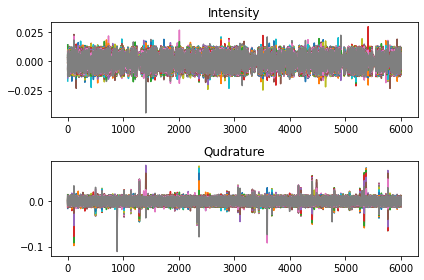

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_BPSK_18)
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_BPSK_18)
axs[1].set_title('Qudrature')
fig.tight_layout()

### BPSK Time Series of one I & Q sample

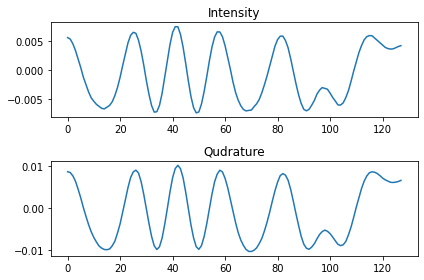

In [25]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_BPSK_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_BPSK_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### BPSK FFT - Intensity only

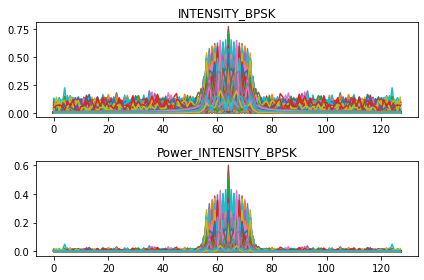

In [14]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_BPSK = abs(np.fft.fftshift(fft(Intensity_BPSK_18[:]-np.mean(Intensity_BPSK_18[:]))))

power_I_BPSK = xf_BPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_BPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_BPSK')

for powerPlot in power_I_BPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_BPSK')

fig.tight_layout()

### BPSK FFT - Quadrature only

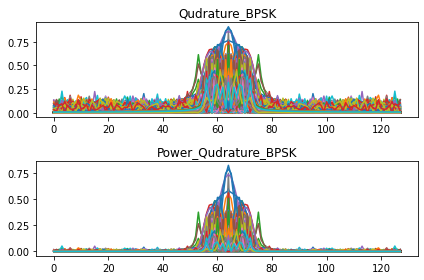

In [15]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_BPSK = abs(np.fft.fftshift(fft(Qudrature_BPSK_18[:]-np.mean(Qudrature_BPSK_18[:]))))

power_Q_BPSK = xf_Q_BPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_BPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_BPSK')

for powerPlot in power_Q_BPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_BPSK')

fig.tight_layout()

### BPSK FFT - Complex IQ

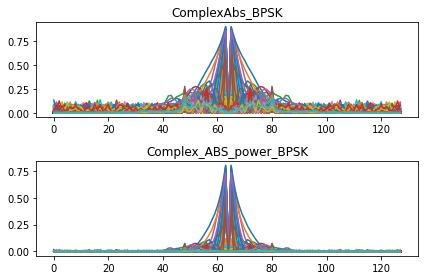

In [17]:
complex_num = Intensity_BPSK_18 + 1j*Qudrature_BPSK_18
abs_complex = abs(complex_num)

xf_complex_abs = abs(np.fft.fftshift(fft(abs_complex[:]-np.mean(abs_complex[:]))))

power_complex_abs = xf_complex_abs **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_abs:
    axs[0].plot(intensityPlot)
axs[0].set_title('ComplexAbs_BPSK')

for powerPlot in power_complex_abs:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_ABS_power_BPSK')

fig.tight_layout()



In [18]:
CPFSK_18 = Xd[('CPFSK',18)]
CPFSK_18.shape

(6000, 2, 128)

In [20]:
Intensity_CPFSK_18 = CPFSK_18[:,0,:] 
Qudrature_CPFSK_18 = CPFSK_18[:,1,:]

### CPFSK Time Series I & Q

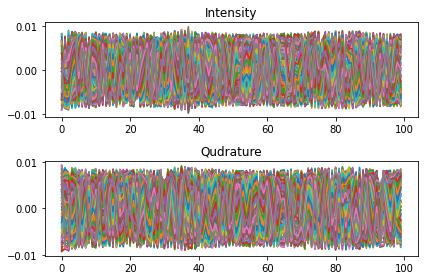

In [21]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_CPFSK_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_CPFSK_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### CPFSK Time Series of one I & Q Sample

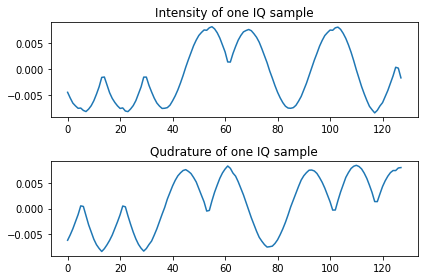

In [22]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_CPFSK_18[99])
axs[0].set_title('Intensity of one IQ sample')

axs[1].plot(Qudrature_CPFSK_18[99])
axs[1].set_title('Qudrature of one IQ sample')
fig.tight_layout()

### CPFSK FFT - Intensity only

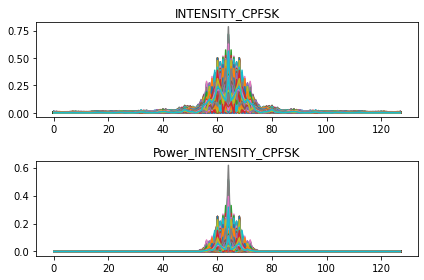

In [23]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_CPFSK = abs(np.fft.fftshift(fft(Intensity_CPFSK_18[:]-np.mean(Intensity_CPFSK_18[:]))))
power_I_CPFSK = xf_CPFSK**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_CPFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_CPFSK')

for powerPlot in power_I_CPFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_CPFSK')

fig.tight_layout()

### CPFSK FFT - Quadrature only

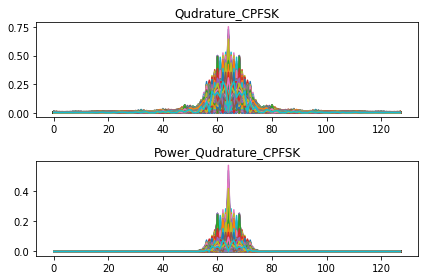

In [66]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_CPFSK = abs(np.fft.fftshift(fft(Qudrature_CPFSK_18[:]-np.mean(Qudrature_CPFSK_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_CPFSK = xf_Q_CPFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_CPFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_CPFSK')

for powerPlot in power_Q_CPFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_CPFSK')

fig.tight_layout()

### CPFSK FFT - Complex IQ 

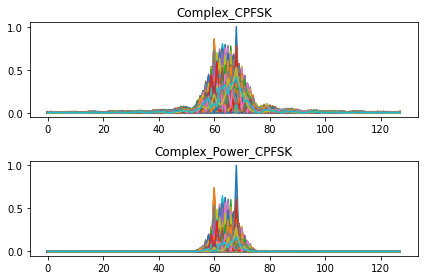

In [26]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_CPFSK = Intensity_CPFSK_18 + 1j*Qudrature_CPFSK_18

xf_complex_CPFSK = abs(np.fft.fftshift(fft(complex_num_CPFSK[:]-np.mean(complex_num_CPFSK[:]))))

power_complex_CPFSK = xf_complex_CPFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_CPFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_CPFSK')

for powerPlot in power_complex_CPFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_CPFSK')

fig.tight_layout()

# PAM4 - SNR 18

In [27]:
PAM4_18 = Xd[('PAM4',18)]
PAM4_18.shape

(6000, 2, 128)

###  PAM4 Time Series I & Q

In [28]:
Intensity_PAM4_18 = PAM4_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_PAM4_18 = PAM4_18[:,1,:]

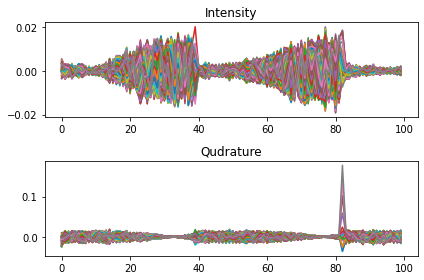

In [29]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_PAM4_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_PAM4_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### PAM4 Time Seris of  one I & Q Sample

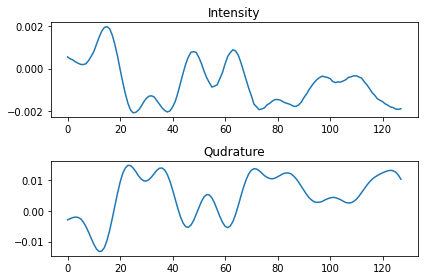

In [30]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_PAM4_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_PAM4_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### PAM 14 FFT - Intensity only

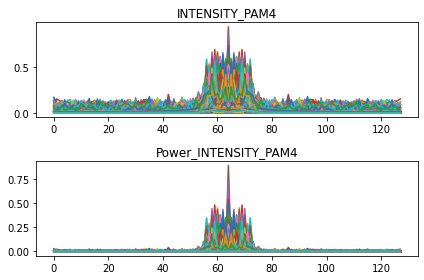

In [31]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_PAM4 = abs(np.fft.fftshift(fft(Intensity_PAM4_18[:]-np.mean(Intensity_PAM4_18[:]))))
power_I_PAM4 = xf_PAM4**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_PAM4:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_PAM4')

for powerPlot in power_I_PAM4:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_PAM4')

fig.tight_layout()

### PAM4 FFT -  Quadrature only

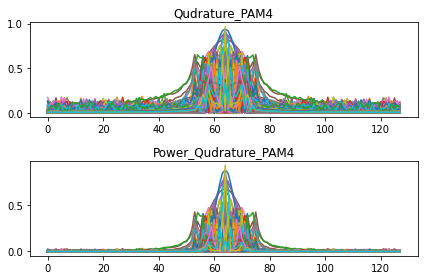

In [32]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_PAM4 = abs(np.fft.fftshift(fft(Qudrature_PAM4_18[:]-np.mean(Qudrature_PAM4_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_PAM4 = xf_Q_PAM4 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_PAM4:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_PAM4')

for powerPlot in power_Q_PAM4:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_PAM4')

fig.tight_layout()

### PAM4 FFT - Complex IQ


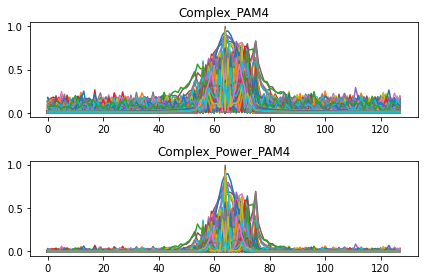

In [33]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_PAM4 = Intensity_PAM4_18 + 1j*Qudrature_PAM4_18

xf_complex_PAM4 = abs(np.fft.fftshift(fft(complex_num_PAM4[:]-np.mean(complex_num_PAM4[:]))))

power_complex_PAM4 = xf_complex_PAM4 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_PAM4:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_PAM4')

for powerPlot in power_complex_PAM4:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_PAM4')

fig.tight_layout()

# QAM16 - SNR 18

In [35]:
QAM16_18 = Xd[('QAM16',18)]
QAM16_18.shape
Intensity_QAM16_18 = QAM16_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_QAM16_18 = QAM16_18[:,1,:]

###  QAM16 Time Series I & Q

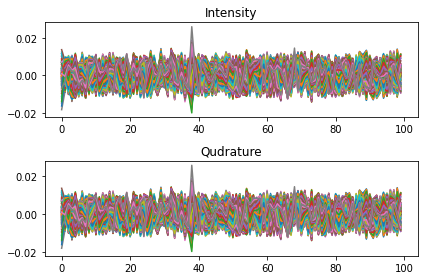

In [65]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_QAM16_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Intensity_QAM16_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

###  QAM16 Time Series of one I & Q sample

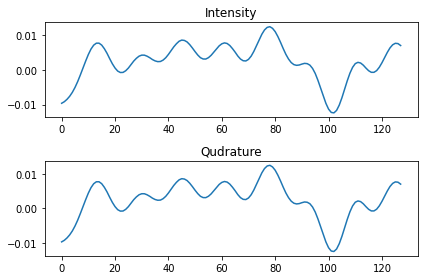

In [61]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_QAM16_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Intensity_QAM16_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### QAM16 FFT - Intensity only


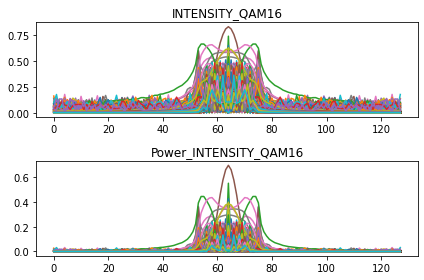

In [36]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_QAM16 = abs(np.fft.fftshift(fft(Intensity_QAM16_18[:]-np.mean(Intensity_QAM16_18[:]))))
power_I_QAM16 = xf_QAM16**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_QAM16:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_QAM16')

for powerPlot in power_I_QAM16:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_QAM16')

fig.tight_layout()

### QAM16 FFT - Quadrature only

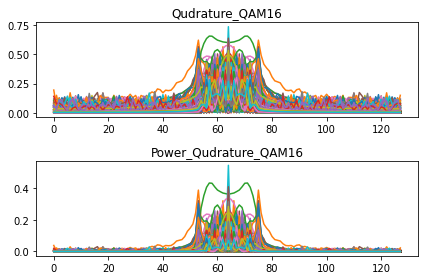

In [37]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_QAM16 = abs(np.fft.fftshift(fft(Qudrature_QAM16_18[:]-np.mean(Qudrature_QAM16_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_QAM16 = xf_Q_QAM16 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_QAM16:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_QAM16')

for powerPlot in power_Q_QAM16:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_QAM16')

fig.tight_layout()


### QAM16 FFT - Complex IQ

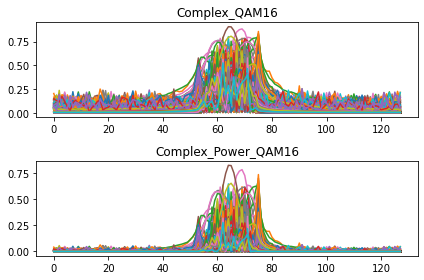

In [38]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_QAM16 = Intensity_QAM16_18 + 1j*Qudrature_QAM16_18

xf_complex_QAM16 = abs(np.fft.fftshift(fft(complex_num_QAM16[:]-np.mean(complex_num_QAM16[:]))))

power_complex_QAM16 = xf_complex_QAM16 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_QAM16:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_QAM16')

for powerPlot in power_complex_QAM16:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_QAM16')

fig.tight_layout()


# QPSK - SNR 18

In [39]:
QPSK_18 = Xd[('QPSK',18)]
QPSK_18.shape

(6000, 2, 128)

In [62]:
Intensity_QPSK_18 = QPSK_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_QPSK_18= QPSK_18[:,1,:]

###  QPSK 18 Time Series I & Q

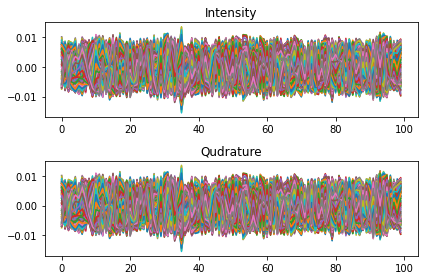

In [63]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_QPSK_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Intensity_QPSK_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

###  QPSK 18 Time Series of  one I & Q sample

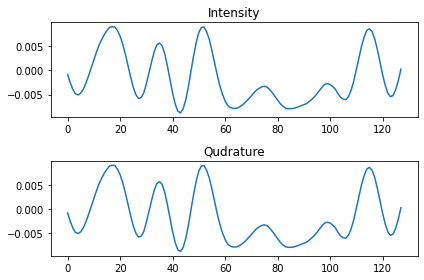

In [64]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_QPSK_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Intensity_QPSK_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### QPSK FFT - Intensity only

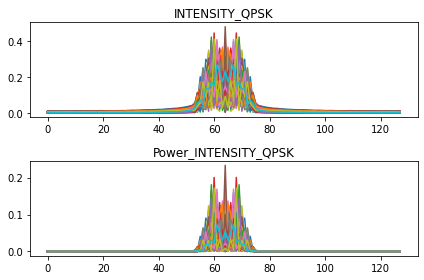

In [41]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_QPSK= abs(np.fft.fftshift(fft(Intensity_QPSK_18[:]-np.mean(Intensity_QPSK_18[:]))))
power_I_QPSK = xf_QPSK**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_QPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_QPSK')

for powerPlot in power_I_QPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_QPSK')

fig.tight_layout()


### QPSK FFT - Quadrature only

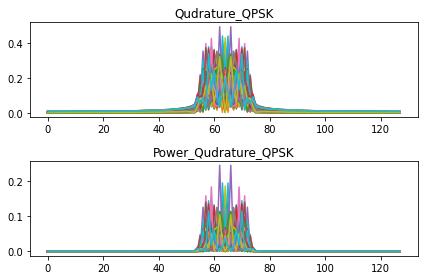

In [42]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_QPSK = abs(np.fft.fftshift(fft(Qudrature_QPSK_18[:]-np.mean(Qudrature_QPSK_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_QPSK = xf_Q_QPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_QPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_QPSK')

for powerPlot in power_Q_QPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_QPSK')

fig.tight_layout()


### QPSK FFT - Complex IQ 

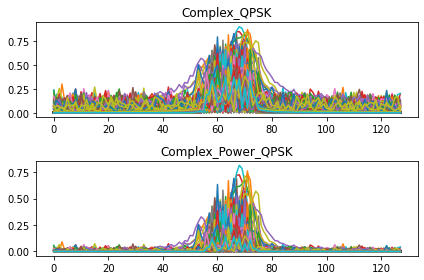

In [74]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_QPSK = Intensity_QPSK_18 + 1j*Qudrature_QPSK_18

xf_complex_QPSK = abs(np.fft.fftshift(fft(complex_num_QPSK[:]-np.mean(complex_num_QPSK[:]))))

power_complex_QPSK = xf_complex_QPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_QPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_QPSK')

for powerPlot in power_complex_QPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_QPSK')

fig.tight_layout()


# GFSK - SNR 18

In [44]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

GFSK_18 = Xd[('GFSK',18)]
GFSK_18.shape


(6000, 2, 128)

###  GFSK 18 Time Series I & Q

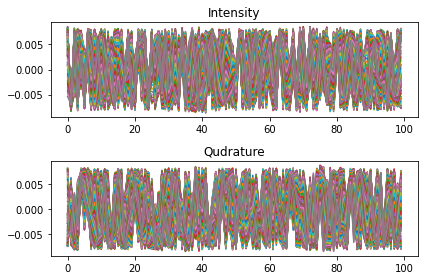

In [67]:
Intensity_GFSK_18 = GFSK_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_GFSK_18= GFSK_18[:,1,:]# Taking only First 100 Quadrature

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_GFSK_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_GFSK_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

###  GFSK 18 Time Series of one I & Q sample

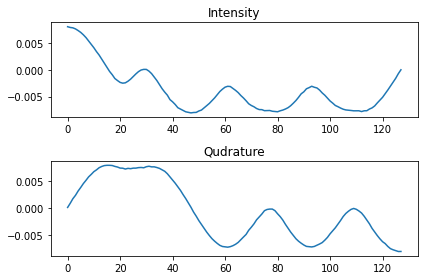

In [68]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_GFSK_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_GFSK_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### GFSK FFT - Intensity only

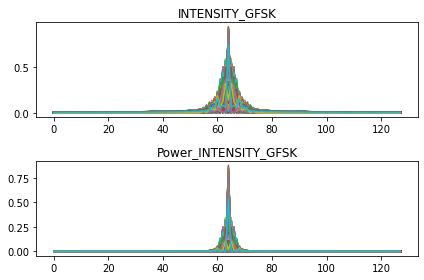

In [46]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_GFSK = abs(np.fft.fftshift(fft(Intensity_GFSK_18[:]-np.mean(Intensity_GFSK_18[:]))))
power_I_GFSK = xf_GFSK**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_GFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_GFSK')

for powerPlot in power_I_GFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_GFSK')

fig.tight_layout()



### GFSK FFT - Quadrature only

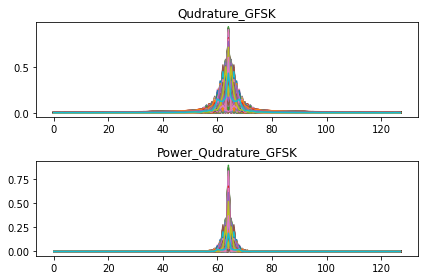

In [47]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_GFSK = abs(np.fft.fftshift(fft(Qudrature_GFSK_18[:]-np.mean(Qudrature_GFSK_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_GFSK = xf_Q_GFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_GFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_GFSK')

for powerPlot in power_Q_GFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_GFSK')

fig.tight_layout()




### GFSK FFT - Complex IQ

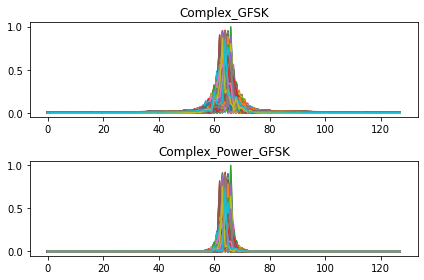

In [48]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_GFSK = Intensity_GFSK_18 + 1j*Qudrature_GFSK_18

xf_complex_GFSK = abs(np.fft.fftshift(fft(complex_num_GFSK[:]-np.mean(complex_num_GFSK[:]))))

power_complex_GFSK = xf_complex_GFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_GFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_GFSK')

for powerPlot in power_complex_GFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_GFSK')

fig.tight_layout()


# AM-DSB - SNR 18

In [69]:
AMDSB_18 = Xd[('AM-DSB',18)]
AMDSB_18.shape
Intensity_AMDSB_18 = AMDSB_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_AMDSB_18= AMDSB_18[:,1,:]# Taking only First 100 Quadrature

### AM-DSB Time Series I & Q

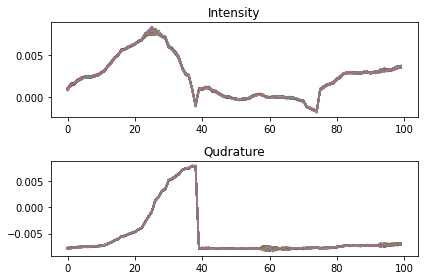

In [70]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_AMDSB_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_AMDSB_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### AM-DSB Time Series of one I & Q sample

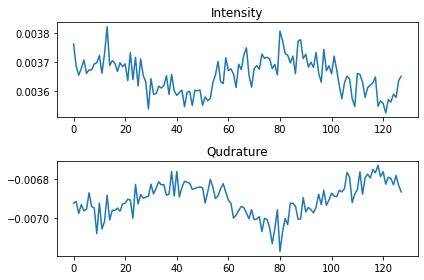

In [71]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_AMDSB_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_AMDSB_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### AM-DSB FFT - Intensity only

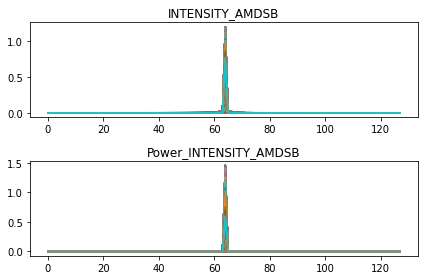

In [52]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_AMDSB= abs(np.fft.fftshift(fft(Intensity_AMDSB_18[:]-np.mean(Intensity_AMDSB_18[:]))))
power_I_AMDSB = xf_AMDSB**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_AMDSB:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_AMDSB')

for powerPlot in power_I_AMDSB:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_AMDSB')

fig.tight_layout()


### AM-DSB FFT - Quadrature only

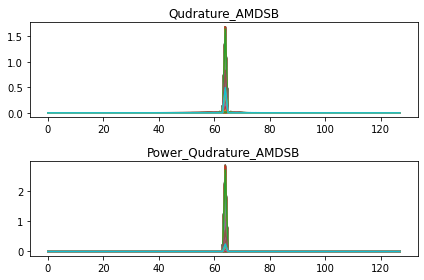

In [53]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_AMDSB= abs(np.fft.fftshift(fft(Qudrature_AMDSB_18[:]-np.mean(Qudrature_AMDSB_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_AMDSB = xf_Q_AMDSB **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_AMDSB:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_AMDSB')

for powerPlot in power_Q_AMDSB:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_AMDSB')

fig.tight_layout()

### AM-DSB FFT - Complex IQ

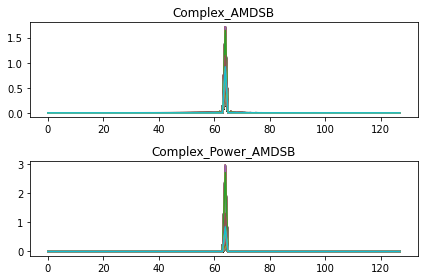

In [54]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_AMDSB = Intensity_AMDSB_18 + 1j*Qudrature_AMDSB_18

xf_complex_AMDSB = abs(np.fft.fftshift(fft(complex_num_AMDSB[:]-np.mean(complex_num_AMDSB[:]))))

power_complex_AMDSB = xf_complex_AMDSB **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_AMDSB:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_AMDSB')

for powerPlot in power_complex_AMDSB:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_AMDSB')

fig.tight_layout()

# WBFM - SNR 18

In [56]:
WBFM_18 = Xd[('WBFM',18)]
WBFM_18.shape

Intensity_WBFM_18 = WBFM_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_WBFM_18 = WBFM_18[:,1,:]# Taking only First 100 Quadrature

### WBFM Time Series I & Q

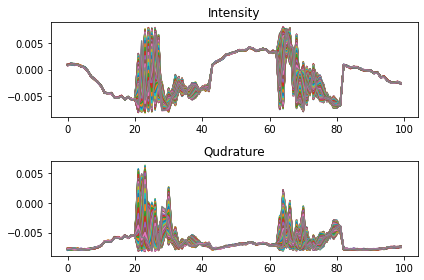

In [73]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_WBFM_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_WBFM_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### WBFM Time series of one I & Q sample

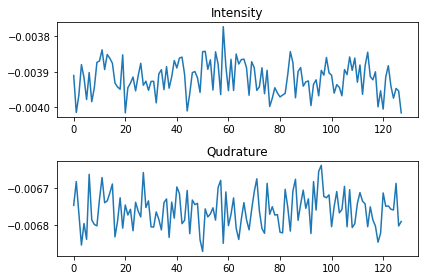

In [72]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_WBFM_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_WBFM_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### WBFM FFT - Intensity only

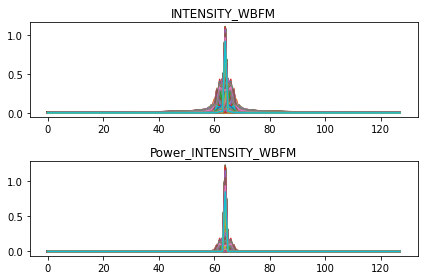

In [57]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_WBFM = abs(np.fft.fftshift(fft(Intensity_WBFM_18[:]-np.mean(Intensity_WBFM_18[:]))))
power_I_WBFM = xf_WBFM**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_WBFM:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_WBFM')

for powerPlot in power_I_WBFM:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_WBFM')

fig.tight_layout()


### WBFM FFT - Quadrature only

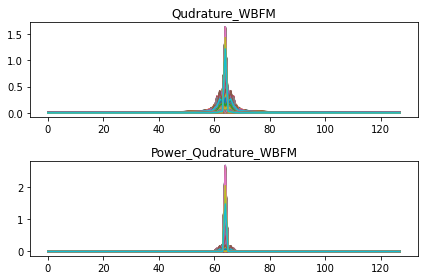

In [58]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_WBFM = abs(np.fft.fftshift(fft(Qudrature_WBFM_18[:]-np.mean(Qudrature_WBFM_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_WBFM= xf_Q_WBFM **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_WBFM:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_WBFM')

for powerPlot in power_Q_WBFM:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_WBFM')

fig.tight_layout()


### WBFM FFT - Complex IQ

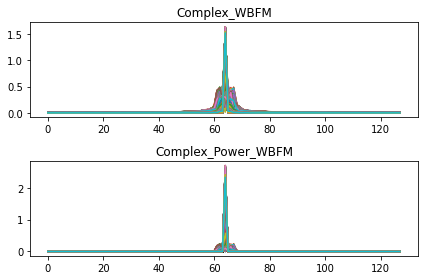

In [59]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_WBFM = Intensity_WBFM_18 + 1j*Qudrature_WBFM_18

xf_complex_WBFM = abs(np.fft.fftshift(fft(complex_num_WBFM[:]-np.mean(complex_num_WBFM[:]))))

power_complex_WBFM = xf_complex_WBFM **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_WBFM:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_WBFM')

for powerPlot in power_complex_WBFM:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_WBFM')

fig.tight_layout()


# 8PSK - SNR 18

In [75]:
PSK8_18 = Xd[('8PSK',18)]
PSK8_18.shape

Intensity_PSK8_18= PSK8_18[:,0,:]  
Qudrature_PSK8_18 = PSK8_18[:,1,:]

### 8PSK Time Series I & Q

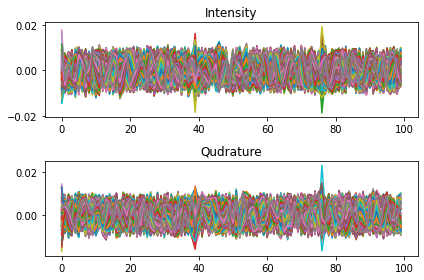

In [78]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_PSK8_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_PSK8_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### 8PSK Time Series of one I & Q sample

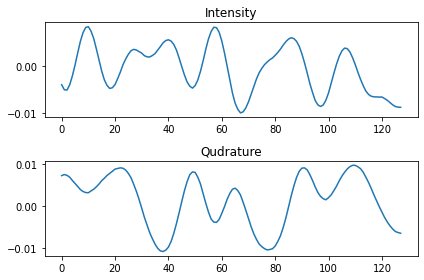

In [79]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_PSK8_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_PSK8_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### 8PSK FFT - Intensity only

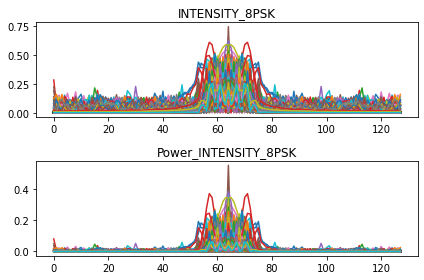

In [76]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_PSK8 = abs(np.fft.fftshift(fft(Intensity_PSK8_18[:]-np.mean(Intensity_PSK8_18[:]))))
power_I_PSK8 = xf_PSK8**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_PSK8:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_8PSK')

for powerPlot in power_I_PSK8:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_8PSK')

fig.tight_layout()


### 8PSK FFT - Quadrature only

In [ ]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_PSK8 = abs(np.fft.fftshift(fft(Qudrature_PSK8_18[:]-np.mean(Qudrature_PSK8_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_PSK8 = xf_Q_PSK8 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_PSK8:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_8PSK')

for powerPlot in power_Q_PSK8:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_8PSK')

fig.tight_layout()


### 8PSK FFT - Complex IQ

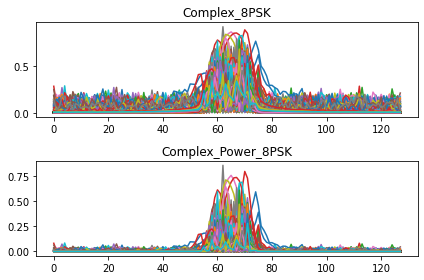

In [77]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_PSK8 = Intensity_PSK8_18 + 1j*Qudrature_PSK8_18

xf_complex_PSK8 = abs(np.fft.fftshift(fft(complex_num_PSK8[:]-np.mean(complex_num_PSK8[:]))))

power_complex_PSK8= xf_complex_PSK8 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_PSK8:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_8PSK')

for powerPlot in power_complex_PSK8:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_8PSK')

fig.tight_layout()


# QAM64 - SNR 18

In [81]:
QAM64_18 = Xd[('QAM64',18)]
QAM64_18.shape

Intensity_QAM64_18= QAM64_18[:,0,:]  
Qudrature_QAM64_18 = QAM64_18[:,1,:]

### QAM64 Time Series I & Q 

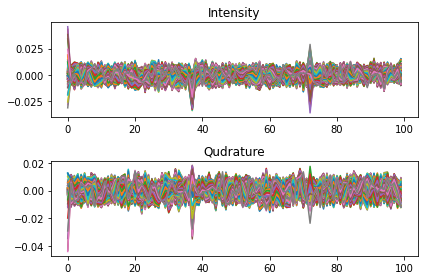

In [83]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_QAM64_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_QAM64_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### QAM64 Time Series of one  I & Q sample

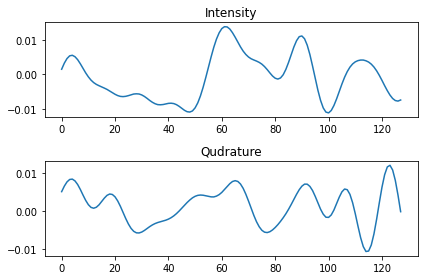

In [84]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_QAM64_18[100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_QAM64_18[100])
axs[1].set_title('Qudrature')
fig.tight_layout()

### QAM64 FFT - Intensity only

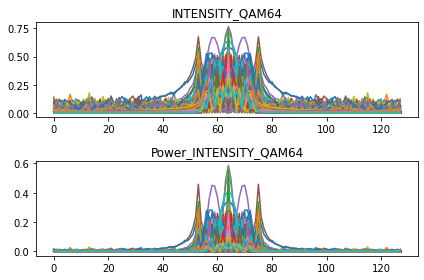

In [85]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_QAM64 = abs(np.fft.fftshift(fft(Intensity_QAM64_18[:]-np.mean(Intensity_QAM64_18[:]))))
power_I_QAM64 = xf_QAM64**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_QAM64:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_QAM64')

for powerPlot in power_I_QAM64:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_QAM64')

fig.tight_layout()

### QAM64 FFT - Quadrature only

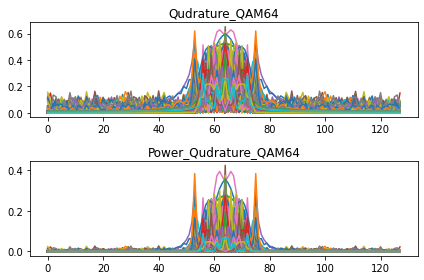

In [86]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_QAM64 = abs(np.fft.fftshift(fft(Qudrature_QAM64_18[:]-np.mean(Qudrature_QAM64_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_QAM64= xf_Q_QAM64 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_QAM64:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_QAM64')

for powerPlot in power_Q_QAM64:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_QAM64')

fig.tight_layout()

### QAM64 FFT - Complex IQ 

In [5]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_QAM64 = Intensity_QAM64_18 + 1j*Qudrature_QAM64_18

xf_complex_QAM64 = abs(np.fft.fftshift(fft(complex_num_QAM64[:]-np.mean(complex_num_QAM64[:]))))

power_complex_QAM64= xf_complex_QAM64 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_QAM64:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_QAM64')

for powerPlot in power_complex_QAM64:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_QAM64')
fig.tight_layout()


NameError: name 'Intensity_QAM64_18' is not defined

## Machine Learning - Multiclass classification on SNR 18 Modulation using FFT 

In [6]:
INTENSITY_AXIS=0
QUADRATURE_AXIS=1
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])


### Preparing Dataset

The Intensity and Qudrature of every IQ samples for each modulation type of SNR 18 is stacked into X_Intensity or X_Quadrature list accordingly. At the same time, the type of modulation is appended to Label_string. It labels the stacked data in X_Intensity and X_Quadrature by indexing.

In [7]:
X_Intensity = []  
X_Quadrature = []
Label_strings = []
for mod in mods:
    X_Intensity.append(Xd[(mod,18)][:,INTENSITY_AXIS,:])
    X_Quadrature.append(Xd[(mod,18)][:,QUADRATURE_AXIS,:])
    for label in range(len(Xd[(mod,18)][:,INTENSITY_AXIS,:])):
        Label_strings.append(mod)
X_Intensity = np.vstack(X_Intensity) # Quick way to create stacked dataset
X_Quadrature = np.vstack(X_Quadrature)

Label_strings=np.vstack(Label_strings)
complex_num = X_Intensity + 1j*X_Quadrature


In [16]:
print(Label_strings)
print(Label_strings.shape)

[['8PSK']
 ['8PSK']
 ['8PSK']
 ...
 ['WBFM']
 ['WBFM']
 ['WBFM']]
(60000, 1)


### Applying FF function on X_Intensity and X_Qudrature

In [8]:
X_Intensity_FFT = abs(np.fft.fftshift(fft(X_Intensity[:]-np.mean(X_Intensity[:]))))
X_Qudrature_FFT = abs(np.fft.fftshift(fft(X_Quadrature[:]-np.mean(X_Quadrature[:]))))

### Labelling

The labels inside Label_String is in string format. Hence, to train a model, these strings have to be represented in integers or bits. Label_String is pre-processed using LabelEncoder to convert into integer and subsequently one hot encoded.

In [9]:
le= preprocessing.LabelEncoder()
le.fit(Label_strings)
Label_Y_numbers = le.transform(Label_strings)
depth = 10
Label = tf.one_hot(Label_Y_numbers,depth)

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [18]:

print(Label)

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(60000, 10), dtype=float32)


The labels are concanated with the dataset for shuffling and model training

In [94]:
X_Intensity_Label = np.c_[X_Intensity_FFT, Label]
X_Quadrature_Label = np.c_[X_Qudrature_FFT,Label]


A precaution step is to duplicate the labelled dataset before shuffling. This is to prevent any changes to the original dataset.

In [95]:
import copy
X_Intensity_Label_shuffled = copy.copy(X_Intensity_Label) # Create another copy to shuffle
X_Quadratue_Label_shuffled = copy.copy(X_Quadrature_Label)

In [96]:
np.random.shuffle(X_Intensity_Label_shuffled)
np.random.shuffle(X_Quadratue_Label_shuffled)

## Training (70%)  , Validation (20%) , Test (10%)

- Training Size : 42,000
- Validation Size : 12000

In [142]:
length_of_X_train = int(0.7*X_Intensity_Label_shuffled.shape[0]) #42000
length_of_X_validation = (int(0.2*X_Intensity_Label_shuffled.shape[0]))+length_of_X_train #12000


42000


In [98]:
Train_Intensity = X_Intensity_Label_shuffled[0:length_of_X_train,0:128]
Y_Intensity = X_Intensity_Label_shuffled[0:length_of_X_train,128:]

Validation_Intensity = X_Intensity_Label_shuffled[length_of_X_train:length_of_X_validation,0:128]
Y_Validation = X_Intensity_Label_shuffled[length_of_X_train:length_of_X_validation,128:]

### Using DNN (4 layers) with relu and softmax as activation function - Classifying using <u>only Intensity FFT</u>  

In [101]:

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)
model2 = Sequential()
model2.add(Dense(128, input_dim=128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
history = model2.fit(Train_Intensity, Y_Intensity, epochs=250, batch_size=100,callbacks=[callback])

Epoch 1/250
420/420 [==============================] - 1s 2ms/step - loss: 1.5405 - accuracy: 0.3881
Epoch 2/250
420/420 [==============================] - 1s 2ms/step - loss: 1.2348 - accuracy: 0.4595
Epoch 3/250
420/420 [==============================] - 2s 4ms/step - loss: 1.1208 - accuracy: 0.4904
Epoch 4/250
420/420 [==============================] - 1s 3ms/step - loss: 1.0700 - accuracy: 0.5063
Epoch 5/250
420/420 [==============================] - 1s 2ms/step - loss: 1.0504 - accuracy: 0.5086
Epoch 6/250
420/420 [==============================] - 1s 3ms/step - loss: 1.0393 - accuracy: 0.5162
Epoch 7/250
420/420 [==============================] - 1s 3ms/step - loss: 1.0296 - accuracy: 0.5171
Epoch 8/250
420/420 [==============================] - 1s 3ms/step - loss: 1.0240 - accuracy: 0.5213
Epoch 9/250
420/420 [==============================] - 1s 3ms/step - loss: 1.0183 - accuracy: 0.5265
Epoch 10/250
420/420 [==============================] - 1s 2ms/step - loss: 1.0136 - accura

420/420 [==============================] - 1s 2ms/step - loss: 0.8504 - accuracy: 0.6166
Epoch 161/250
420/420 [==============================] - 1s 3ms/step - loss: 0.8491 - accuracy: 0.6143
Epoch 162/250
420/420 [==============================] - 1s 3ms/step - loss: 0.8491 - accuracy: 0.6139
Epoch 163/250
420/420 [==============================] - 1s 3ms/step - loss: 0.8495 - accuracy: 0.6155
Epoch 164/250
420/420 [==============================] - 1s 3ms/step - loss: 0.8473 - accuracy: 0.6181
Epoch 165/250
420/420 [==============================] - 1s 3ms/step - loss: 0.8479 - accuracy: 0.6164
Epoch 166/250
420/420 [==============================] - 1s 2ms/step - loss: 0.8466 - accuracy: 0.6167
Epoch 167/250
420/420 [==============================] - 1s 2ms/step - loss: 0.8473 - accuracy: 0.6170
Epoch 168/250
420/420 [==============================] - 1s 3ms/step - loss: 0.8456 - accuracy: 0.6166
Epoch 169/250
420/420 [==============================] - 1s 3ms/step - loss: 0.8468 - a

In [103]:
_, accuracy = model2.evaluate(Validation_Intensity, Y_Validation)
print('Accuracy: %.2f' % (accuracy*100))

375/375 [==============================] - 0s 824us/step - loss: 1.0510 - accuracy: 0.5655
Accuracy: 56.55


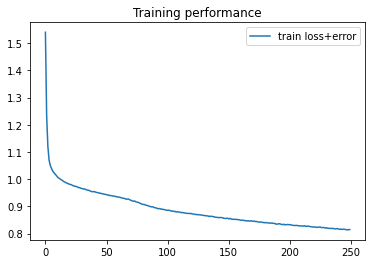

In [104]:
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.legend()


In [105]:
Train_Quadrature = X_Quadratue_Label_shuffled[0:length_of_X_train,0:128]
Y_Quadrature = X_Quadratue_Label_shuffled[0:length_of_X_train,128:]

Validation_Quadraturey = X_Quadratue_Label_shuffled[length_of_X_train:length_of_X_validation,0:128]
Y_Validation_Quadrature = X_Quadratue_Label_shuffled[length_of_X_train:length_of_X_validation,128:]

### Using DNN (4 layers) with relu and softmax as activation function - Classifying using <u>only Quadrature FFT</u>

In [106]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)

model_Quadrature = Sequential()
model_Quadrature.add(Dense(128, input_dim=128, activation='relu'))
model_Quadrature.add(Dense(64, activation='relu'))
model_Quadrature.add(Dense(32, activation='relu'))
model_Quadrature.add(Dense(10, activation='softmax'))

model_Quadrature.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
history_Quadrature = model_Quadrature.fit(Train_Quadrature, Y_Quadrature, epochs=4000,validation_data=(Validation_Quadraturey, Y_Validation_Quadrature), batch_size=100,
                     callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/4000
420/420 [==============================] - 1s 2ms/step - loss: 1.5412 - accuracy: 0.3775 - val_loss: 1.3114 - val_accuracy: 0.4504
Epoch 2/4000
420/420 [==============================] - 1s 1ms/step - loss: 1.2067 - accuracy: 0.4791 - val_loss: 1.1254 - val_accuracy: 0.4929
Epoch 3/4000
420/420 [==============================] - 1s 1ms/step - loss: 1.1020 - accuracy: 0.5060 - val_loss: 1.0757 - val_accuracy: 0.5121
Epoch 4/4000
420/420 [==============================] - 1s 1ms/step - loss: 1.0667 - accuracy: 0.5173 - val_loss: 1.0420 - val_accuracy: 0.5244
Epoch 5/4000
420/420 [==============================] - 1s 1ms/step - loss: 1.0493 - accuracy: 0.5256 - val_loss: 1.0346 - val_accuracy: 0.5313
Epoch 6/4000
420/420 [==============================] - 1s 1ms/step - loss: 1.0383 - accuracy: 0.5249 - val_loss: 1.0559 - val_accuracy: 0.5113
Epoch 7/4000
420/420 [==============================] - 1s 2ms/step - loss: 1.0297 - accuracy: 0.5305 - val_loss: 1.0129 - val_accuracy:

In [108]:
_, accuracy = model_Quadrature.evaluate(Validation_Quadraturey, Y_Validation_Quadrature)
print('Accuracy: %.2f' % (accuracy*100))


375/375 [==============================] - 0s 1ms/step - loss: 0.9489 - accuracy: 0.5573
Accuracy: 55.73


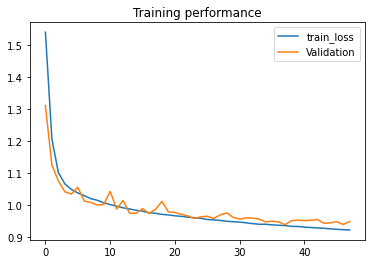

In [109]:
plt.figure()
plt.title('Training performance')
plt.plot(history_Quadrature.history['loss'], label='train_loss')
plt.plot(history_Quadrature.history['val_loss'], label='Validation')
plt.legend()
plt.show()


### Using DNN (4 layers) with relu and softmax as activation function - Classifying using <u> only Complex I & Q FFT </u>

In [110]:
X_complex_FFT = abs(np.fft.fftshift(fft(complex_num[:]-np.mean(complex_num[:]))))
X_complex_Label = np.c_[X_complex_FFT,Label]
import copy
X_complex_Label_shuffled = copy.copy(X_complex_Label) # Create another copy to shuffle


In [111]:
np.random.shuffle(X_complex_Label_shuffled)

In [112]:
Train_complex = X_complex_Label_shuffled[0:length_of_X_train,0:128]
Y_complex = X_complex_Label_shuffled[0:length_of_X_train,128:]

print(Train_complex.shape)
Validation_complex = X_complex_Label_shuffled[length_of_X_train:length_of_X_validation,0:128]
Y_validation_complex = X_complex_Label_shuffled[length_of_X_train:length_of_X_validation,128:]

(42000, 128)


In [113]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model3 = Sequential()
model3.add(Dense(128, input_dim=128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
history3 = model3.fit(Train_complex, Y_complex, epochs=6000, batch_size=100,validation_data=(Validation_complex, Y_validation_complex),
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/6000
420/420 [==============================] - 1s 2ms/step - loss: 1.4795 - accuracy: 0.4053 - val_loss: 1.3265 - val_accuracy: 0.4485
Epoch 2/6000
420/420 [==============================] - 1s 2ms/step - loss: 1.2182 - accuracy: 0.4839 - val_loss: 1.1321 - val_accuracy: 0.5122
Epoch 3/6000
420/420 [==============================] - 1s 1ms/step - loss: 1.0319 - accuracy: 0.5417 - val_loss: 0.9519 - val_accuracy: 0.5849
Epoch 4/6000
420/420 [==============================] - 1s 1ms/step - loss: 0.9068 - accuracy: 0.5743 - val_loss: 0.9513 - val_accuracy: 0.5278
Epoch 5/6000
420/420 [==============================] - 1s 1ms/step - loss: 0.8440 - accuracy: 0.5947 - val_loss: 0.8054 - val_accuracy: 0.6112
Epoch 6/6000
420/420 [==============================] - 1s 1ms/step - loss: 0.8124 - accuracy: 0.6025 - val_loss: 0.8263 - val_accuracy: 0.5788
Epoch 7/6000
420/420 [==============================] - 1s 1ms/step - loss: 0.7880 - accuracy: 0.6135 - val_loss: 0.8064 - val_accuracy:

In [115]:
_, accuracy = model3.evaluate(Validation_complex, Y_validation_complex)
print('Accuracy: %.2f' % (accuracy*100))

375/375 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.6783
Accuracy: 67.83


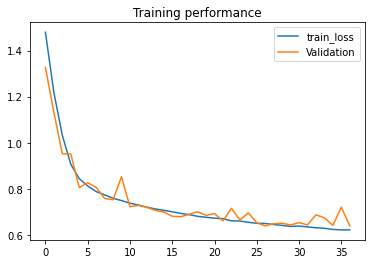

In [116]:
plt.figure()
plt.title('Training performance')
#plt.plot(history3.epoch, history3.history['loss'], label='train loss+error')
#plt.plot(history3.epoch, history3.history['val_loss'], label= 'val_loss')
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend()
plt.show()


## Classifying using Support Vector Machine (SVM)

In [117]:
X_Intensity_FFT = abs(np.fft.fftshift(fft(X_Intensity[:]-np.mean(X_Intensity[:]))))
X_Quadrature_FFT = abs(np.fft.fftshift(fft(X_Quadrature[:]-np.mean(X_Quadrature[:]))))
X_complex_FFT = abs(np.fft.fftshift(fft(complex_num[:]-np.mean(complex_num[:]))))

X_Power_Intensity_FFT = X_Intensity_FFT**2
X_Power_Quadrature_FFT = X_Quadrature_FFT**2
X_Power_complex_FFT = X_complex_FFT**2

le_svm= preprocessing.LabelEncoder()
le_svm.fit(Label_strings)
Label_Y_numbers_SVM = le.transform(Label_strings)

In [118]:
X_Intensity_Label_SVM = np.c_[X_Intensity_FFT, Label_Y_numbers_SVM]
X_Quadrature_Label_SVM = np.c_[X_Quadrature_FFT,Label_Y_numbers_SVM]
X_complex_Label_SVM = np.c_[X_complex_FFT,Label_Y_numbers_SVM]

X_Intensity_Label_SVM.shape

(60000, 129)

In [119]:
import copy
X_Intensity_Label_shuffled_SVM = copy.copy(X_Intensity_Label_SVM) # Create another copy to shuffle
X_Quadratue_Label_shuffled_SVM = copy.copy(X_Quadrature_Label_SVM)
X_complex_Label_shuffled_SVM = copy.copy(X_complex_Label_SVM)

np.random.shuffle(X_Intensity_Label_shuffled_SVM)
np.random.shuffle(X_Quadratue_Label_shuffled_SVM)
np.random.shuffle(X_complex_Label_shuffled_SVM)

length_of_X_train_SVM = int(0.7*X_Intensity_Label_shuffled_SVM.shape[0]) #42000
length_of_X_validation_SVM = (int(0.2*X_Intensity_Label_shuffled_SVM.shape[0]))+length_of_X_train #12000
length_of_X_train_SVM

42000

### SVM with only Intensity FFT

In [120]:
Train_Intensity_SVM = X_Intensity_Label_shuffled_SVM[0:length_of_X_train_SVM,0:128]
Y_Intensity_SVM = X_Intensity_Label_shuffled_SVM[0:length_of_X_train_SVM,128:]

Validation_Intensity_SVM = X_Intensity_Label_shuffled_SVM[length_of_X_train_SVM:length_of_X_validation_SVM,0:128]
Y_Validation_SVM = X_Intensity_Label_shuffled_SVM[length_of_X_train_SVM:length_of_X_validation_SVM,128:]


In [121]:
Y_Intensity_1D_SVM = np.ravel(Y_Intensity_SVM,order = 'C')
Y_Intensity_1D_SVM

array([1., 1., 8., ..., 6., 6., 8.])

In [122]:
from sklearn import svm
# Creating a SVM Classifier 
svm_classifier_rbf = svm.SVC(kernel='rbf')
svm_classifier_rbf.fit(Train_Intensity_SVM,Y_Intensity_1D_SVM)

SVC()

In [123]:
y_pred_rbf=svm_classifier_rbf.predict(Validation_Intensity_SVM)#using Radial Base Function Kernal
y_pred_rbf

array([3., 3., 5., ..., 1., 0., 3.])

In [124]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_Validation_SVM, y_pred_rbf))

Accuracy: 0.5334166666666667


### SVM with Complex I & Q FFT

In [125]:
Train_complex_SVM = X_complex_Label_shuffled_SVM[0:length_of_X_train_SVM,0:128]
Y_complex_SVM = X_complex_Label_shuffled_SVM[0:length_of_X_train_SVM,128:]

print(Train_complex_SVM.shape)
Validation_complex_SVM = X_complex_Label_shuffled_SVM[length_of_X_train_SVM:length_of_X_validation_SVM,0:128]
Y_validation_complex_SVM = X_complex_Label_shuffled_SVM[length_of_X_train_SVM:length_of_X_validation_SVM,128:]

(42000, 128)


In [126]:
Y_complex_1D_SVM = np.ravel(Y_complex_SVM,order='C')

In [127]:
from sklearn import svm
# Creating a SVM Classifier 
svm_classifier_rbf_Complex_SVM = svm.SVC(kernel='rbf')
svm_classifier_rbf_Complex_SVM.fit(Train_complex_SVM,Y_complex_1D_SVM)

SVC()

In [130]:
from sklearn import metrics
y_pred_rbf_complex_SVM=svm_classifier_rbf_Complex_SVM.predict(Validation_complex_SVM)

In [131]:
Y_validation_complex_1D_SVM = np.ravel(Y_validation_complex_SVM,order= 'C')
y_pred_rbf_complex_SVM

array([2., 1., 2., ..., 0., 6., 7.])

In [132]:
print("Accuracy:",metrics.accuracy_score(Y_validation_complex_1D_SVM, y_pred_rbf_complex_SVM))

Accuracy: 0.6800833333333334


## Random Forest Classifier - Complex I & Q FFT

In [133]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 150)
classifier.fit(Train_complex_SVM, Y_complex_1D_SVM)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=150)

In [134]:
y_pred_random = classifier.predict(Validation_complex_SVM)

In [135]:
print("Accuracy:",metrics.accuracy_score(Y_validation_complex_1D_SVM, y_pred_random))

Accuracy: 0.6933333333333334


In [144]:
np.random.seed(2016)
X_Intensity_Dataset = np.c_[X_Intensity, Label]

In [145]:
import copy
X_Intensity_Dataset_Label_shuffled = copy.copy(X_Intensity_Dataset)
np.random.shuffle(X_Intensity_Dataset_Label_shuffled)

length_of_X_train = int(0.7*X_Intensity_Dataset_Label_shuffled.shape[0]) #42000
length_of_X_validation = (int(0.2*X_Intensity_Dataset_Label_shuffled.shape[0]))+length_of_X_train #12000
print(length_of_X_validation)

54000


## Convolution 1D - Time Series


In [146]:
Train_Intensity_Dataset_Time1D = X_Intensity_Dataset_Label_shuffled[0:length_of_X_train,0:128]
Y_Train_Intensity_Dataset_Time1D  = X_Intensity_Dataset_Label_shuffled[0:length_of_X_train,128:]

Validation_Intensity_Dataset_Time1D  = X_Intensity_Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:128]
Y_Validation_Intensity_Dataset_Time1D  = X_Intensity_Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,128:]

Validation_Intensity_Dataset_Time1D .shape

(12000, 128)

In [148]:
BATCH_SIZE = 100

In [149]:
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D
model_m = Sequential()
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(128,1)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalMaxPooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(10, activation='softmax'))
print(model_m.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 119, 100)          1100      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 110, 100)          100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 36, 100)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 27, 160)           160160    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 18, 160)           256160    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 160)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)              

In [150]:
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [151]:

Train_Intensity_Dataset_Time1D=Train_Intensity_Dataset_Time1D.reshape(42000,128,1)
Validation_Intensity_Dataset_Time1D=Validation_Intensity_Dataset_Time1D.reshape(12000,128,1)
print(Validation_Intensity_Dataset_Time1D.shape)

(12000, 128, 1)


In [154]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# import tensorflow as tf

EPOCHS = 300
historyTime1D = model_m.fit(Train_Intensity_Dataset_Time1D,
                      Y_Train_Intensity_Dataset_Time1D,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                     validation_data=(Validation_Intensity_Dataset_Time1D, Y_Validation_Intensity_Dataset_Time1D),
                    callbacks = [tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])

Epoch 1/300
420/420 [==============================] - 3s 6ms/step - loss: 1.7282 - accuracy: 0.3166 - val_loss: 1.3117 - val_accuracy: 0.4272
Epoch 2/300
420/420 [==============================] - 3s 6ms/step - loss: 1.2841 - accuracy: 0.4556 - val_loss: 1.0462 - val_accuracy: 0.5378
Epoch 3/300
420/420 [==============================] - 3s 6ms/step - loss: 1.1313 - accuracy: 0.5141 - val_loss: 0.9404 - val_accuracy: 0.5926
Epoch 4/300
420/420 [==============================] - 3s 6ms/step - loss: 1.0540 - accuracy: 0.5385 - val_loss: 0.9074 - val_accuracy: 0.6070
Epoch 5/300
420/420 [==============================] - 3s 6ms/step - loss: 1.0097 - accuracy: 0.5601 - val_loss: 0.8721 - val_accuracy: 0.6169
Epoch 6/300
420/420 [==============================] - 3s 6ms/step - loss: 0.9766 - accuracy: 0.5714 - val_loss: 0.8644 - val_accuracy: 0.6281
Epoch 7/300
420/420 [==============================] - 3s 6ms/step - loss: 0.9479 - accuracy: 0.5834 - val_loss: 0.8308 - val_accuracy: 0.6309

In [156]:
_, accuracy = model_m.evaluate(Validation_Intensity_Dataset_Time1D, Y_Validation_Intensity_Dataset_Time1D)
print('Accuracy: %.2f' % (accuracy*100))

375/375 [==============================] - 1s 2ms/step - loss: 0.6405 - accuracy: 0.7042
Accuracy: 70.42


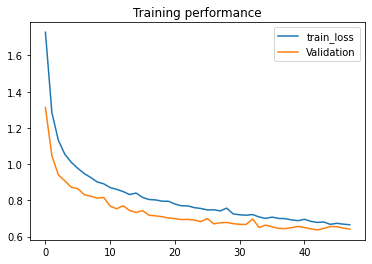

In [158]:
plt.figure()
plt.title('Training performance')
plt.plot(historyTime1D.history['loss'], label='train_loss')
plt.plot(historyTime1D.history['val_loss'], label='Validation')
plt.legend()
plt.show()


In [177]:
import copy
X_Dataset_complex = np.c_[X_Intensity,X_Quadrature, Label]

X_Dataset_complex_Label_shuffled = copy.copy(X_Dataset_complex)
np.random.shuffle(X_Dataset_complex_Label_shuffled)

length_of_X_train_complex = int(0.7*X_Dataset_complex_Label_shuffled.shape[0]) #42000
length_of_X_validation_complex = (int(0.2*X_Dataset_complex_Label_shuffled.shape[0]))+length_of_X_train #12000


Train_Dataset_complex = X_Dataset_complex_Label_shuffled[0:length_of_X_train_complex,0:256]
Y_Train_Dataset_complex = X_Dataset_complex_Label_shuffled[0:length_of_X_train_complex,256:]

Validation_Dataset_complex = X_Dataset_complex_Label_shuffled[length_of_X_train_complex:length_of_X_validation_complex,0:256]
Y_Validation_Dataset_complex = X_Dataset_complex_Label_shuffled[length_of_X_train_complex:length_of_X_validation_complex,256:]





In [178]:
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D

model_Dataset = Sequential()
model_Dataset.add(Conv1D(100, 10, activation='relu', input_shape=(256,1)))
model_Dataset.add(Conv1D(100, 10, activation='relu'))
model_Dataset.add(MaxPooling1D(3))
model_Dataset.add(Conv1D(160, 10, activation='relu'))
model_Dataset.add(Conv1D(160, 10, activation='relu'))
model_Dataset.add(GlobalMaxPooling1D())
model_Dataset.add(Dropout(0.5))
model_Dataset.add(Dense(10, activation='softmax'))
print(model_Dataset.summary())

model_Dataset.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 247, 100)          1100      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 238, 100)          100100    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 79, 100)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 70, 160)           160160    
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 61, 160)           256160    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 160)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 160)              

In [179]:
Train_Dataset_complex=Train_Dataset_complex.reshape(42000,256,1)
Validation_Dataset_complex=Validation_Dataset_complex.reshape(12000,256,1)


In [180]:
EPOCHS = 300
history_Dataset = model_Dataset.fit(Train_Dataset_complex,
                      Y_Train_Dataset_complex,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_data=(Validation_Dataset_complex, Y_Validation_Dataset_complex),
                    callbacks =[tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])

Epoch 1/300
420/420 [==============================] - 5s 12ms/step - loss: 1.6355 - accuracy: 0.3437 - val_loss: 1.0581 - val_accuracy: 0.5772
Epoch 2/300
420/420 [==============================] - 5s 11ms/step - loss: 1.0907 - accuracy: 0.5454 - val_loss: 0.8988 - val_accuracy: 0.6438
Epoch 3/300
420/420 [==============================] - 5s 11ms/step - loss: 0.9364 - accuracy: 0.5971 - val_loss: 0.7668 - val_accuracy: 0.6817
Epoch 4/300
420/420 [==============================] - 5s 12ms/step - loss: 0.8578 - accuracy: 0.6255 - val_loss: 0.7270 - val_accuracy: 0.6762
Epoch 5/300
420/420 [==============================] - 5s 12ms/step - loss: 0.8204 - accuracy: 0.6361 - val_loss: 0.7267 - val_accuracy: 0.6790
Epoch 6/300
420/420 [==============================] - 5s 12ms/step - loss: 0.7777 - accuracy: 0.6542 - val_loss: 0.7144 - val_accuracy: 0.6790
Epoch 7/300
420/420 [==============================] - 5s 12ms/step - loss: 0.7595 - accuracy: 0.6601 - val_loss: 0.6522 - val_accuracy:

In [181]:
_, accuracy = model_Dataset.evaluate(Validation_Dataset_complex, Y_Validation_Dataset_complex)
print('Accuracy: %.2f' % (accuracy*100))

375/375 [==============================] - 1s 3ms/step - loss: 0.4527 - accuracy: 0.7828
Accuracy: 78.28


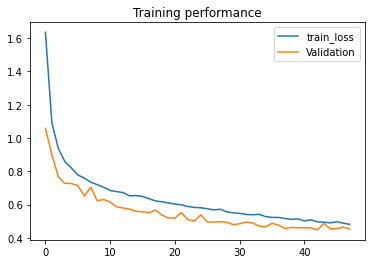

In [182]:
plt.figure()
plt.title('Training performance')
plt.plot(history_Dataset.history['loss'], label='train_loss')
plt.plot(history_Dataset.history['val_loss'], label='Validation')
plt.legend()
plt.show()